<a href="https://colab.research.google.com/github/Gitilyass/MSc-Thesis/blob/main/Interbank_lending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

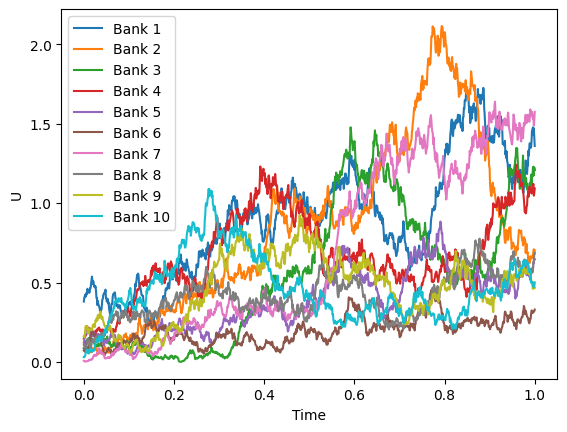

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interbank_lending_model(N, k, b, c, q, rho, T, dt, lam):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1/lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t-1]) - U[n, t-1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t-1]) * dt + q * np.sqrt(np.abs(U[n, t-1])) * dW[n, t-1]
            U[n, t] = U[n, t-1] + dU + rho * U[n, t-1] * dt

    return U

# Parameters
N = 10 # Number of banks
k = 1
b = 0.5
c = 1
q = 1
rho = 0.3
T = 1.0
dt = 0.001
lam = 10  # Exponential distribution parameter

# Simulate interbank lending model
U = interbank_lending_model(N, k, b, c, q, rho, T, dt, lam)

# Plot results
t = np.linspace(0, T, int(T / dt))
for n in range(N):
    plt.plot(t, U[n], label=f"Bank {n+1}")

plt.xlabel("Time")
plt.ylabel("U")
plt.legend()
plt.show()


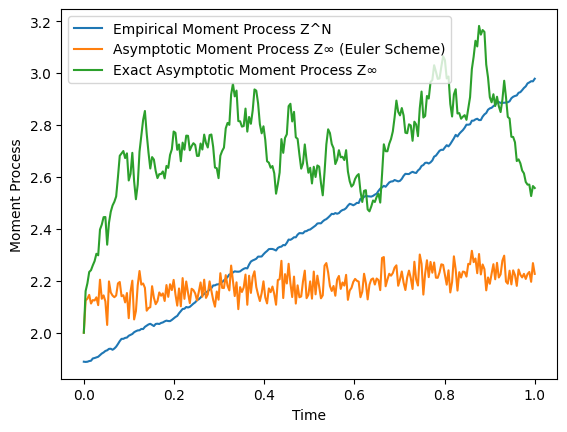

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interbank_lending_model(N, k, b, c, q, rho, T, dt, lam):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1/lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t-1]) - U[n, t-1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t-1]) * dt + q * np.sqrt(np.abs(U[n, t-1])) * dW[n, t-1]
            U[n, t] = U[n, t-1] + dU + rho * U[n, t-1] * dt

    return U

def empirical_moment_process(U):
    return np.mean(U, axis=0)

def asymptotic_moment_process(t, dt, k, b, c, rho, dX):
    num_steps = len(t)
    Z = np.zeros(num_steps)
    Z[0] = 1 / lam  # Initial value of Z∞

    for i in range(1, num_steps):
        integral_term = np.exp((b - c - 0.5 * rho**2) * t[i] + rho * np.sum(dX[:i]))
        Z[i] = (1 / lam) * np.exp((b - c - 0.5 * rho**2) * t[i] + rho * dX[i]) + k * integral_term

    return Z

def exact_asymptotic_moment(t, k, b, c, rho, X):
    num_steps = len(t)
    Z = np.zeros(num_steps)
    Z[0] = 1 / lam  # Initial value of Z∞

    for i in range(1, num_steps):
        integral_term = np.exp((b - c - 0.5 * rho**2) * t[i] + rho * X[i-1])
        Z[i] = (1 / lam) * np.exp((b - c - 0.5 * rho**2) * t[i] + rho * X[i]) + k * integral_term

    return Z

# Parameters
N = 500  # Number of banks
k = 0.1
b = 1.1
c = 1
rho = 0.3
t_M = 1
dt = 1/252
lam = 0.5

# Simulate interbank lending model
U = interbank_lending_model(N, k, b, c, q, rho, t_M, dt, lam)

# Calculate empirical moment process
Z_N = empirical_moment_process(U)

# Generate Brownian motion increments for asymptotic moment process
dX = np.sqrt(dt) * np.random.randn(int(t_M / dt))

# Calculate asymptotic moment process
t = np.linspace(0, t_M, int(t_M / dt))
Z_asymptotic = asymptotic_moment_process(t, dt, k, b, c, rho, dX)

# Calculate exact asymptotic moment process
X = np.cumsum(dX)
Z_exact_asymptotic = exact_asymptotic_moment(t, k, b, c, rho, X)

# Plot results
plt.plot(t, Z_N, label="Empirical Moment Process Z^N")
plt.plot(t, Z_asymptotic, label="Asymptotic Moment Process Z∞ (Euler Scheme)")
plt.plot(t, Z_exact_asymptotic, label="Exact Asymptotic Moment Process Z∞")
plt.xlabel("Time")
plt.ylabel("Moment Process")
plt.legend()
plt.show()


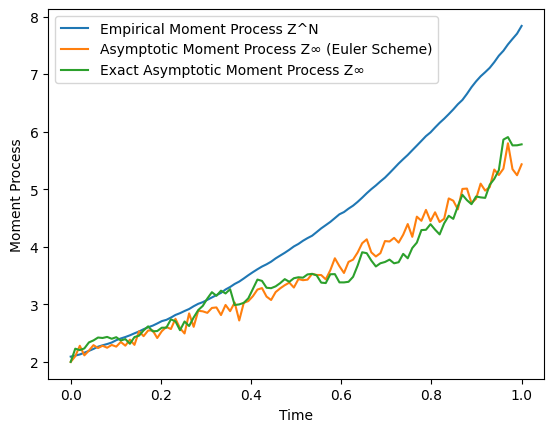

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interbank_lending_model(N, k, b, c, q, rho, T, dt, lam):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1/lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t-1]) - U[n, t-1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t-1]) * dt + q * np.sqrt(np.abs(U[n, t-1])) * dW[n, t-1]
            U[n, t] = U[n, t-1] + dU + rho * U[n, t-1] * dt

    return U

def empirical_moment_process(U):
    return np.mean(U, axis=0)

def asymptotic_moment_process(t, dt, k, b, c, rho, dX):
    num_steps = len(t)
    Z = np.zeros(num_steps)
    Z[0] = 1 / lam  # Initial value of Z∞

    for i in range(1, num_steps):
        integral_term = np.exp((b - c - 0.5 * rho**2) * t[i] + rho * np.sum(dX[:i]))
        Z[i] = (1 / lam) * np.exp((b - c - 0.5 * rho**2) * t[i] + rho * dX[i-1]) + k * integral_term

    return Z

def exact_asymptotic_moment_inf(t, k, b, c, rho, X):
    num_steps = len(t)
    Z = np.zeros(num_steps)
    Z[0] = 1 / lam  # Initial value of Z∞

    for i in range(1, num_steps):
        integral_term = np.exp((b - c - 0.5 * rho**2) * t[i] + rho * X[i-1])
        Z[i] = (1 / lam) * np.exp((b - c - 0.5 * rho**2) * t[i] + rho * X[i]) + k * integral_term

    return Z


# Parameters
N = 500  # Number of banks
k = 0.1
b = 2
c = 1
rho = 0.3
t_M = 1
dt = 0.01

# Simulate interbank lending model
U = interbank_lending_model(N, k, b, c, q, rho, t_M, dt, lam)

# Calculate empirical moment process
Z_N = empirical_moment_process(U)

# Generate Brownian motion increments for asymptotic moment process
dX = np.sqrt(dt) * np.random.randn(int(t_M / dt))

# Calculate asymptotic moment process
t = np.linspace(0, t_M, int(t_M / dt))
Z_asymptotic = asymptotic_moment_process(t, dt, k, b, c, rho, dX)

# Calculate exact asymptotic moment process
X = np.cumsum(dX)
Z_exact_asymptotic = exact_asymptotic_moment_inf(t, k, b, c, rho, X)

# Plot results
plt.plot(t, Z_N, label="Empirical Moment Process Z^N")
plt.plot(t, Z_asymptotic, label="Asymptotic Moment Process Z∞ (Euler Scheme)")
plt.plot(t, Z_exact_asymptotic, label="Exact Asymptotic Moment Process Z∞")
plt.xlabel("Time")
plt.ylabel("Moment Process")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad

# Define the stochastic process X(t, dt)
def brownian_motion(t_M, dt):
    num_steps = int(np.ceil(t_M / dt))
    np.random.seed(0)  # Seed the random number generator
    dX = np.sqrt(dt) * np.random.randn(num_steps)
    X = np.cumsum(dX)
    return X

# Define the integrand as a function of s and t
def integrand(s, t):
    dt = 0.01  # Time step for Brownian motion
    X_t = brownian_motion(t, dt)
    X_s = brownian_motion(s, dt)
    return np.exp((b - c - 1/2 * rho**2) *(t - s) + rho * (X_t[-1] - X_s[-1]))




In [ ]:
import numpy as np
from scipy.integrate import trapz
from scipy.integrate import cumulative_trapezoid

def Psi(s, t):
    Psi_matrix = np.identity(2)
    Psi_matrix[1, 1] = integrand(s, t)
    return Psi_matrix

def Psi_sequence(s, t_values):
    Psi_seq = [Psi(s, t) for t in t_values]
    Psi_seq = np.array(Psi_seq)
    return Psi_seq

def exact_asymptotic_moment(t_values, dt, k, b, c, rho, lam):
    Z = [1/lam]
    for t in t_values:
        X_t = brownian_motion(t,dt)
        integral_value, _ = quad(integrand, 0, t, args=(t,))
        Zt_inf = (1 / lam) * np.exp((b - c - 1/2 * rho**2) * t + rho * X_t[-1]) + k * integral_value
        Z.append(Zt_inf)
    Z = np.array(Z)
    return Z

#Define the covariance function
def B(t, dt, k, b, c, rho, lam):
    B_matrix = np.zeros((2, 2))
    B_matrix[1, 1] = exact_asymptotic_moment(t, dt, k, b, c, rho, lam)
    return B_matrix

def B_sequence(t_values, dt, k, b, c, rho, lam):
    B_seq = []
    for t in t_values:
        B_matrix = B(t, dt, k, b, c, rho, lam)
        B_seq.append(B_matrix)
    B_seq = np.array(B_seq)
    return B_seq


# Define the estimate_moments function
def estimate_moments_matrix(t_0, t_M, delta, dt, k, b, c, q, rho, lam, N):
    U = interbank_lending_model(N, k, b, c, q, rho, t_M, dt, lam)
    Z_N = empirical_moment_process(U)
    M = int((t_M - t_0) / delta)
    t_values = np.linspace(t_0, t_M, M)
    Z_inf = exact_asymptotic_moment(t_values, dt, k, b, c, rho, lam)
    first_moment, second_moment = [], []
    w = np.array([0,1])

    for i, t in enumerate(t_values, start=1):
        Psi_val = Psi(t - delta, t)
        Psi_inv = np.linalg.inv(Psi_val)
        X_t = brownian_motion(t, dt)
        integral_value, _ = quad(integrand, 0, t, args=(t,), limit=100)

        AmN = Z_N[i-1] * np.exp((b - c - 1/2 * rho**2) * delta + rho * (X_t[-1] - X_t[-2])) + k * integral_value

        # Element-wise integration using np.vectorize

        def integrand_vec(u):
            Psi_seq = Psi_sequence(t - delta, u)
            B_seq = B_sequence(u, dt, k, b, c, rho, lam)
            Psi_inv = np.linalg.inv(Psi_seq[-1])
            return np.matmul(np.matmul(Psi_inv, B_seq[-1]), Psi_inv.T)

        # Update the integration step
        BmN_squared = np.matmul(Psi(t-delta,t), np.matmul(cumulative_trapezoid(integrand_vec, [t - delta, t], initial=0)[-1], Psi(t-delta,t).T))
        BmN_squared = np.matmul(w.T,np.matmul(BmN_squared,w))


        first_moment.append(AmN)
        second_moment.append(BmN_squared)

    return first_moment, second_moment




In [ ]:
def estimate_moments(t_0, t_M, delta, dt, k, b, c, q, rho, lam, N):
    U = interbank_lending_model(N, k, b, c, q, rho, t_M, dt, lam)
    Z_N = empirical_moment_process(U)
    M = int((t_M - t_0) / delta)
    t_values = np.linspace(t_0, t_M, M)
    Z_inf = exact_asymptotic_moment(t_values, dt, k, b, c, rho, lam)
    first_moment, second_moment = [], []
    w = np.array([0,1])

    for i, t in enumerate(t_values, start=1):
        Psi_val = Psi(t - delta, t)
        Psi_inv = np.linalg.inv(Psi_val)
        X_t = brownian_motion(t, dt)
        integral_value, _ = quad(integrand, 0, t, args=(t,), limit=100)

        AmN = Z_N[i-1] * np.exp((b - c - 1/2 * rho**2) * delta + rho * (X_t[-1] - X_t[-2])) + k * integral_value
        BmN_squared, _ = quad(lambda u, t=t: Z_inf[i]*np.exp(2*(b-c-1/2*rho**2)*(t-u)+2*rho*(X_t[-1]-brownian_motion(u,dt)[-1])), t-delta, t, args=(t,), limit=200)

        first_moment.append(AmN)
        second_moment.append(BmN_squared)

    return first_moment, second_moment

In [ ]:
t_0 = 0.1  # Initial time
t_M = 5.1  # Final time
delta = 1/12  # Time step for moments
dt = 0.001  # Time step for Brownian motion
k = 0.2  # Interbank lending constant
b = 2  # Parameter b
c = 1  # Parameter c
q = 1  # Parameter q
rho = 0.3  # Parameter rho
lam = 0.5  # Parameter lambda
N = 100  # Number of banks

first_moment, second_moment = estimate_moments(t_0, t_M, delta, dt, k, b, c, q, rho, lam, N)


<ipython-input-5-fd4d275069b0>:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(integrand, 0, t, args=(t,))
<ipython-input-6-f004672fa550>:17: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a spe

In [ ]:
print(first_moment,second_moment)

[2.089471372450543, 2.111471819146832, 2.1169968014237996, 2.132185032355539, 2.1874324378930017, 2.1682576283555903, 2.208457688857254, 2.171691075616989, 2.2301964684425166, 2.2925664464600106, 2.378188901466321, 2.4095477001697576, 2.5371700704582905, 2.6337729594137165, 2.784350048791288, 2.861736688966254, 2.9985137263337007, 3.0832711056151307, 3.162047053654417, 3.2912047722326863, 3.2953373522274907, 3.2111751494108445, 3.3243776321840497, 3.7084203936539617, 3.7993185624726094, 3.9633877493686898, 3.9545636612648245, 4.0598365908439975, 4.172219741721122, 4.327628121168729, 4.081593444147176, 4.234291812026347, 4.56647089843003, 5.109213654629113, 5.500038788304968, 5.651439215573099, 5.7441405503212195, 5.784400198312211, 6.25312519419185, 6.310040319942008, 6.302782889029622, 6.11958233041535, 6.751212120016631, 6.847891358757057, 6.818601617486194, 6.767749836107564, 7.432084716239727, 7.594207665717084, 8.297433311148632, 9.377217936808186, 9.330806687353665, 9.88735293827

<ipython-input-5-fd4d275069b0>:19: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(integrand, 0, t, args=(t,))
<ipython-input-6-f004672fa550>:17: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a spe

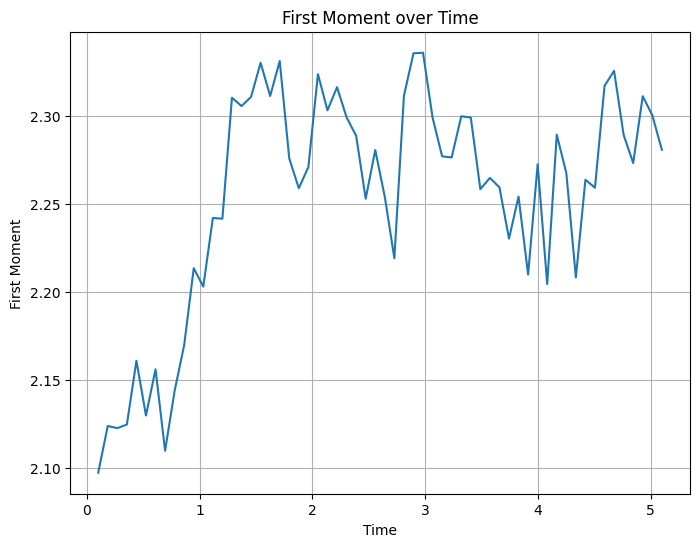

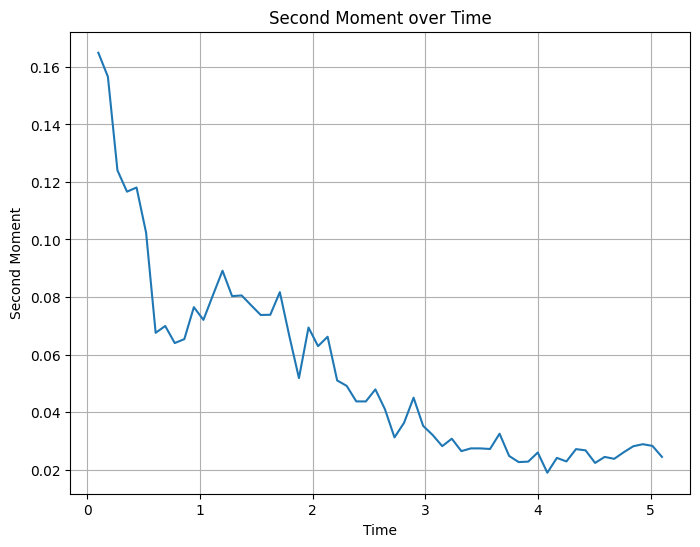

In [ ]:
import matplotlib.pyplot as plt

# Define your input parameters
t_0 = 0.1  # Initial time
t_M = 5.1  # Final time
delta = 1/12  # Time step for moments
dt = 0.001  # Time step for Brownian motion
k = 0.2  # Interbank lending constant
b = 0.5  # Parameter b
c = 1  # Parameter c
q = 1  # Parameter q
rho = 0.3  # Parameter rho
lam = 0.5  # Parameter lambda
N = 100  # Number of banks

# Call the estimate_moments function
first_moment, second_moment = estimate_moments(t_0, t_M, delta, dt, k, b, c, q, rho, lam, N)

# Create an array of time values
t_values = np.linspace(t_0, t_M, len(first_moment))

# Plot the first moment
plt.figure(figsize=(8, 6))
plt.plot(t_values, first_moment)
plt.xlabel('Time')
plt.ylabel('First Moment')
plt.title('First Moment over Time')
plt.grid(True)
plt.show()

# Plot the second moment
plt.figure(figsize=(8, 6))
plt.plot(t_values, second_moment)
plt.xlabel('Time')
plt.ylabel('Second Moment')
plt.title('Second Moment over Time')
plt.grid(True)
plt.show()



<ipython-input-11-bdc8a4ca3bbb>:92: RuntimeWarning: invalid value encountered in log
  L += np.log(10**(-10) + np.sqrt(N) / (B[m] + 10**(-10)) * stats.norm.cdf(np.sqrt(N) * (Z[m] - A[m]) / (B[m]+10**(-10))))


Optimization did not converge for simulation 3
Optimization did not converge for simulation 1
Optimization did not converge for simulation 3
Optimization did not converge for simulation 1
Optimization did not converge for simulation 3
Estimation Results:
N	Parameter	Mean Estimate	MSE		Mean Error	Standard Deviation
10	b		2.2848944365103945	1.8378099352892492	0.6848944365103943	1.5989512485797288
10	rho		0.9877925886814835	0.7224370765924039	0.5077925886814835	0.8025297407299731
10	k		1.3847186201040842	2.4034541438807557	0.504718620104084	1.601371116027382
10	lam		1.2565220833531174	1.9193099605819661	0.45652208335311767	1.4330060646536504
50	b		1.7347389789512977	1.7250766281153407	0.5347389789512977	1.80408237584306
50	rho		0.8783510013490539	0.7218796762021102	0.5183510013490538	0.8879191383510602
50	k		1.2431542869974828	2.372693374675695	0.5831542869974825	1.6841022014087916
50	lam		1.1288595037683116	1.8931464486203435	0.5288595037683117	1.5088212872666291
100	b		1.734738978951297

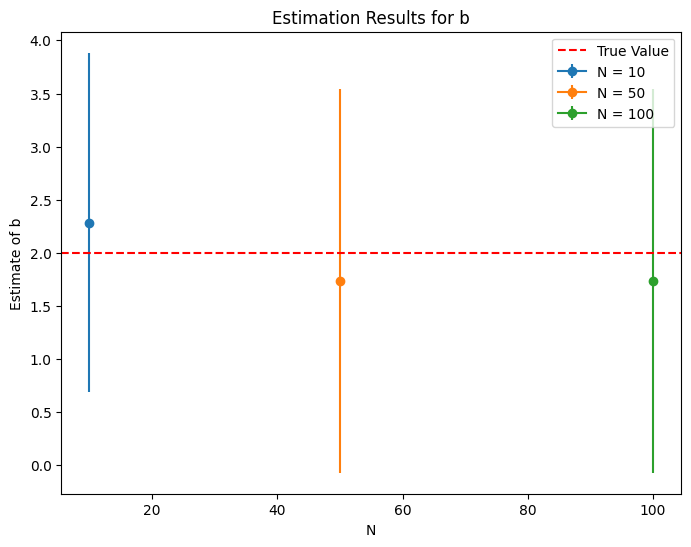

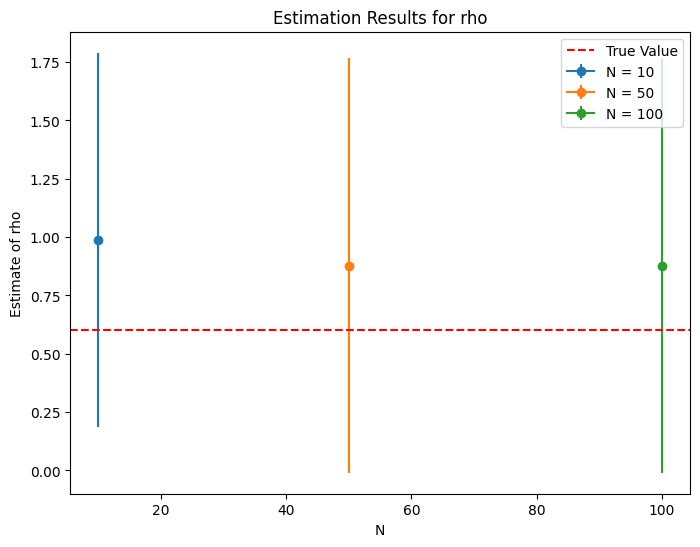

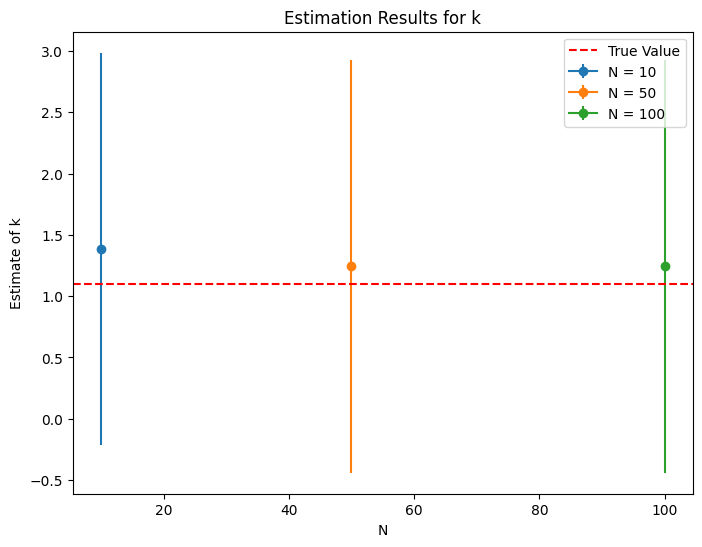

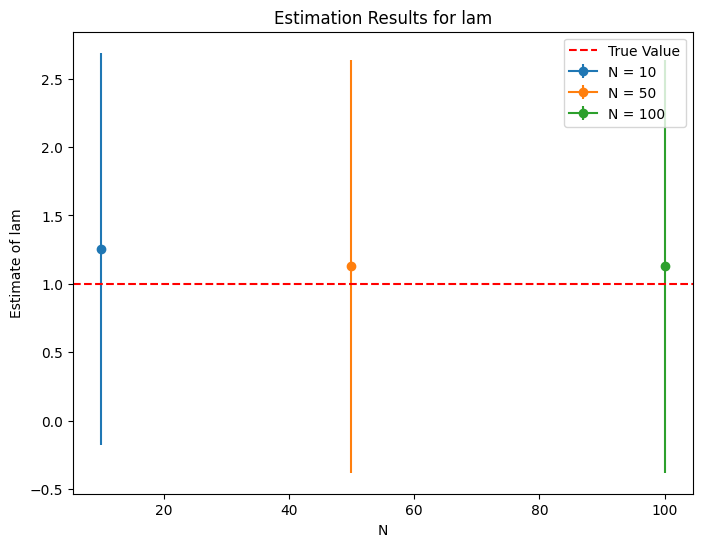

In [ ]:
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math

# Define the true parameter values
c_true = 1
q_true = 1
b_true = 2  # Updated true parameter value for b
rho_true = 0.6  # Updated true parameter value for rho
k_true = 1.1  # Updated true parameter value for k
lam_true = 1  # Updated true parameter value for lam
theta_star = [b_true, rho_true, k_true, lam_true]
t_0 = 0.1  # Initial time
t_M = 25.1  # Final time
delta = 1/12  # Time step for moments

# Define the parameter space
param_space = [(-10, 10), (0, 3), (0, 5), (10**(-5), 5)]  # [b, rho, k, lam]

def brownian_motion(t_M_values, dt, num_paths=1, seed=None):  # Add a seed parameter
    num_steps = int(np.ceil(np.max(t_M_values) / dt))
    if seed is not None:  # Set the random seed if provided
        np.random.seed(seed)
    dX = np.sqrt(dt) * np.random.randn(num_paths, num_steps)
    dX[:, 0] = 0
    X = np.cumsum(dX, axis=1)
    return X

def integrand(s, t_values, b, c, rho):
    t_values = t_values[:, None]
    X_t = brownian_motion(t_values, dt)[:, -1][:, None]
    X_s = brownian_motion(s, dt)[:, -1]
    return np.exp((b - c - 1/2 * rho**2) * (t_values - s) + rho * (X_t - X_s))

def exact_asymptotic_moment(t_values, dt, k, b, c, rho, lam):
    num_steps = len(t_values)
    num_paths = 500
    Z = np.zeros((num_paths, num_steps))
    Z[:, 0] = 1 / lam

    for i in range(1, num_steps):
        t = t_values[i]
        X_t = brownian_motion(t_values[:i+1], dt, num_paths=num_paths)
        exp_values = np.exp((b - c - 0.5 * rho ** 2) * (t - t_values[:i]) + rho * (X_t[:, -1][:, None] - X_t[:, i][:, None]))
        Z[:, i] = (1 / lam) * np.exp((b - c - 0.5 * rho**2) * t + rho * X_t[:, -1]) + k * np.mean(exp_values, axis=1)

    return Z

def monte_carlo_integration(integrand_values, delta):
    num_samples = len(integrand_values)
    integral_value = np.mean(integrand_values) * delta
    return integral_value

def estimate_moments(t_0, t_M, delta, dt, k, b, c, q, rho, lam, N, num_samples, seed=None):
    U = interbank_lending_model(N, k, b, c, q, rho, t_M, dt, lam)
    Z_N = empirical_moment_process(U)
    M = math.ceil((t_M - t_0) / delta)  # Reduced from math.ceil((t_M - t_0) / delta) for faster runtime
    t_values = np.linspace(t_0, t_M, M)
    Z_inf = exact_asymptotic_moment(t_values, dt, k, b, c, rho, lam)
    first_moment, second_moment = [], []

    X_t_all = brownian_motion(t_values, dt, num_paths=num_samples, seed=seed)  # Pass the seed to brownian_motion
    X_t_prev = X_t_all[:, :-1]
    X_t = X_t_all[:, 1:]

    for i, t in enumerate(t_values, start=1):
        # Monte Carlo integration for first moment
        s_samples = np.random.uniform(0, t, num_samples)
        integrand_values = integrand(s_samples, t_values[:i], b, c, rho)  # Pass all time points up to t
        integral_value = monte_carlo_integration(integrand_values, delta)  # Use the monte_carlo_integration function

        AmN = Z_N[i-1] * np.exp((b - c - 1/2 * rho**2) * delta + rho * (X_t[:, i-1] - X_t_prev[:, i-1])) + k * integral_value

        # Monte Carlo integration for second moment
        s_samples = np.random.uniform(0, t - delta, num_samples)  # Make s_samples of shape (num_samples,)
        exp_term = np.exp(2 * (b - c - 1/2 * rho**2) * (t - s_samples) + 2 * rho * (X_t[:, i-1][:, None] - brownian_motion(s_samples, dt, num_paths=num_samples)[:, -1][:, None]))
        Z_inf_expanded = Z_inf[:, i-1][:, None, None]  # Add an axis to Z_inf
        BmN_squared = np.mean(Z_inf_expanded * exp_term, axis=0)  # Take the mean over the num_samples axis

        first_moment.append(AmN)
        second_moment.append(BmN_squared)

    return first_moment, second_moment

def log_likelihood(theta, N, A, B, Z, M):
    b, rho, k, lam = theta
    L = 0
    for m in range(1, M):
        L += np.log(10**(-10) + np.sqrt(N) / (B[m] + 10**(-10)) * stats.norm.cdf(np.sqrt(N) * (Z[m] - A[m]) / (B[m]+10**(-10))))
    return -L.sum()

def perform_parameter_estimation(N_values, num_simulations=10):
    mean_estimates = []
    mse_values = []
    mean_errors = []
    std_devs = []

    for N in N_values:
        estimates = np.zeros((num_simulations, len(param_space)))
        mse = np.zeros(len(param_space))
        mean_error = np.zeros(len(param_space))
        std_dev = np.zeros(len(param_space))
        log_likelihood_values = []

        M = 20  # Reduced from math.ceil((t_M - t_0) / delta) for faster runtime

        for sim in range(num_simulations):
            seed = sim  # Use the simulation index as the seed value
            initial_theta = np.array([np.random.uniform(low, high) for (low, high) in param_space])
            A, B = estimate_moments(t_0, t_M, delta, dt, initial_theta[0], initial_theta[1], c_true, q_true, initial_theta[2], initial_theta[3], N, num_samples=20, seed=seed)  # Pass the seed to estimate_moments
            t_values = np.linspace(t_0, t_M, M)
            Z_inf = exact_asymptotic_moment(t_values, dt, initial_theta[0], initial_theta[1], c_true, initial_theta[2], initial_theta[3])
            objective_func = lambda params: log_likelihood(params, N, A, B, Z_inf, M)
            bounds = tuple(param_space)  # Use the parameter space as bounds
            result = optimize.minimize(objective_func, initial_theta, method="L-BFGS-B", bounds=bounds, tol=1e-4)
            if result.success:
                estimated_theta = result.x
                llv = -result.fun
                estimates[sim] = estimated_theta
                mse += (estimated_theta - theta_star) ** 2
                mean_error += estimated_theta - theta_star
            else:
                print(f"Optimization did not converge for simulation {sim+1}")

        mean_estimates.append(np.mean(estimates, axis=0))
        mse_values.append(mse / num_simulations)
        mean_errors.append(mean_error / num_simulations)
        std_devs.append(np.std(estimates, axis=0))
        log_likelihood_values.append(llv / num_simulations)

    return mean_estimates, mse_values, mean_errors, std_devs, log_likelihood_values

# Define the number of simulations and different N values
num_simulations = 5
N_values = [10, 50, 100]

# Perform parameter estimation
mean_estimates, mse_values, mean_errors, std_devs, log_likelihood_values = perform_parameter_estimation(N_values, num_simulations)

# Print the estimation results
print("Estimation Results:")
print("N\tParameter\tMean Estimate\tMSE\t\tMean Error\tStandard Deviation")
for i, N in enumerate(N_values):
    for j, param in enumerate(["b", "rho", "k", "lam"]):
        print(f"{N}\t{param}\t\t{mean_estimates[i][j]}\t{mse_values[i][j]}\t{mean_errors[i][j]}\t{std_devs[i][j]}")

# Plot the estimation results
param_names = ["b", "rho", "k", "lam"]
for i, param in enumerate(param_names):
    plt.figure(figsize=(8, 6))
    for j, N in enumerate(N_values):
        plt.errorbar(
            [N],
            [mean_estimates[j][i]],
            yerr=[std_devs[j][i]],
            marker="o",
            label=f"N = {N}",
        )
    plt.axhline(y=theta_star[i], color="red", linestyle="--", label="True Value")
    plt.xlabel("N")
    plt.ylabel(f"Estimate of {param}")
    plt.title(f"Estimation Results for {param}")
    plt.legend()
    plt.show()

In [ ]:
def log_likelihood(theta, N, A, B, Z, M):
    b, rho, k, lam = theta
    L = 0
    for m in range(1, M):
        value = np.sqrt(N) / (B[m] + 1e-10) * stats.norm.cdf(np.sqrt(N) * (Z[m] - A[m]) / (B[m]+1e-10))
        if np.any(np.isnan(value)):  # Check if any element in the array is NaN
            L += -1e10
        else:
            L += np.log(10**(-10) + value)
    return -L.sum()


<ipython-input-15-ab7e420f622b>:9: RuntimeWarning: invalid value encountered in log
  L += np.log(10**(-10) + value)


Optimization did not converge for simulation 1
Optimization did not converge for simulation 4
Optimization did not converge for simulation 5
Optimization did not converge for simulation 1
Optimization did not converge for simulation 4
Optimization did not converge for simulation 5
Optimization did not converge for simulation 1
Optimization did not converge for simulation 4
Optimization did not converge for simulation 5


<ipython-input-16-5f89aab29798>:38: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


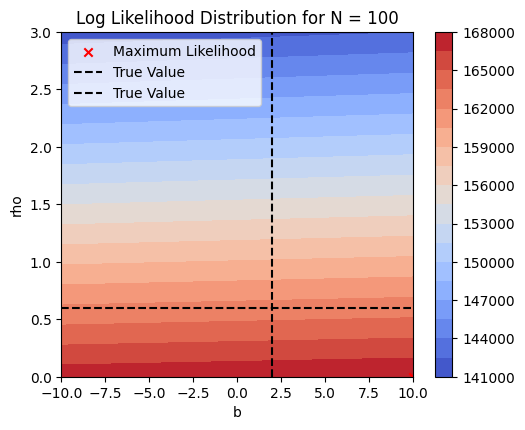

In [ ]:
M = 20
param_space = [(-10, 10), (0, 3), (0, 5), (10**(-5), 5)]
num_simulations = 5

def plot_log_likelihood_distribution(log_likelihood_values_all, N_values, param_space):
    plt.figure(figsize=(10, 8))
    param_names = ["b", "rho", "k", "lam"]

    for i, N in enumerate(N_values):
        log_likelihood_values = log_likelihood_values_all[i]

        # Perform grid search over the parameter space
        b_values, rho_values, k_values, lam_values = param_space
        grid_b, grid_rho, grid_k, grid_lam = np.meshgrid(b_values, rho_values, k_values, lam_values, indexing="ij")
        grid_likelihood = np.full_like(grid_b, fill_value=np.nan, dtype=float)  # Initialize with NaNs

        for i, b in enumerate(b_values):
            for j, rho in enumerate(rho_values):
                for k, k_val in enumerate(k_values):
                    for l, lam_val in enumerate(lam_values):
                        # Integrate calculation of A, B, and Z_inf for each set of parameter values
                        A, B = estimate_moments(t_0, t_M, delta, dt, b, rho, c_true, q_true, k_val, lam_val, N, num_samples=20, seed=None)
                        t_values = np.linspace(t_0, t_M, M)
                        Z_inf = exact_asymptotic_moment(t_values, dt, b, rho, c_true, k_val, lam_val)
                        grid_likelihood[i, j, k, l] = log_likelihood([b, rho, k_val, lam_val], N, A, B, Z_inf, M)

        # Find the maximum log likelihood and corresponding parameters
        max_likelihood = np.nanmax(grid_likelihood)
        max_params = np.unravel_index(np.nanargmax(grid_likelihood), grid_likelihood.shape)
        max_b, max_rho, max_k, max_lam = (
            grid_b[max_params],
            grid_rho[max_params],
            grid_k[max_params],
            grid_lam[max_params],
        )

        # Plot the log likelihood distribution
        plt.subplot(2, 2, i + 1)
        plt.contourf(grid_b[:, :, 0, 0], grid_rho[:, :, 0, 0], grid_likelihood[:, :, 0, 0], levels=20, cmap="coolwarm")
        plt.colorbar()
        plt.scatter([max_b], [max_rho], color="red", marker="x", label="Maximum Likelihood")
        plt.axhline(y=rho_true, color="black", linestyle="--", label="True Value")
        plt.axvline(x=b_true, color="black", linestyle="--", label="True Value")
        plt.xlabel("b")
        plt.ylabel("rho")
        plt.title(f"Log Likelihood Distribution for N = {N}")
        plt.legend()

    plt.tight_layout()
    plt.show()



# Perform parameter estimation and store log likelihood values for all N values
log_likelihood_values_all = []
for N in N_values:
    _, _, _, _, log_likelihood_values = perform_parameter_estimation([N], num_simulations)
    log_likelihood_values_all.append(log_likelihood_values[0])  # Extract log likelihood values for this N

# Plot the log likelihood distribution
plot_log_likelihood_distribution(log_likelihood_values_all, N_values, param_space)

<ipython-input-15-ab7e420f622b>:9: RuntimeWarning: invalid value encountered in log
  L += np.log(10**(-10) + value)


Optimization did not converge for simulation 4
Optimization did not converge for simulation 5
Optimization did not converge for simulation 1
Optimization did not converge for simulation 4
Optimization did not converge for simulation 5
Optimization did not converge for simulation 1
Optimization did not converge for simulation 4
Optimization did not converge for simulation 5


/usr/local/lib/python3.10/dist-packages/matplotlib/tri/_triangulation.py:179: RuntimeWarning: invalid value encountered in cast
  triangles = np.asarray(triangles, dtype=np.int32)
<ipython-input-17-fd5b4fab6377>:39: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 2, i + 1, projection='3d')


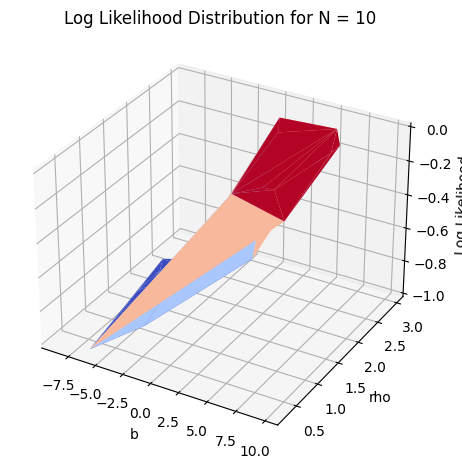

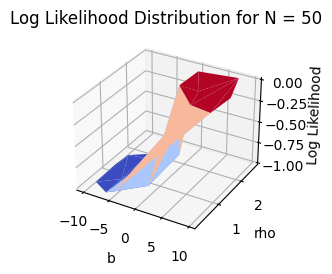

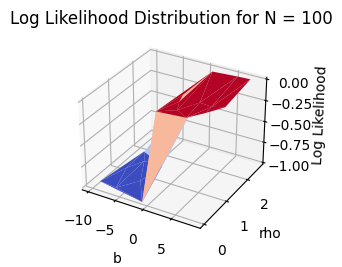

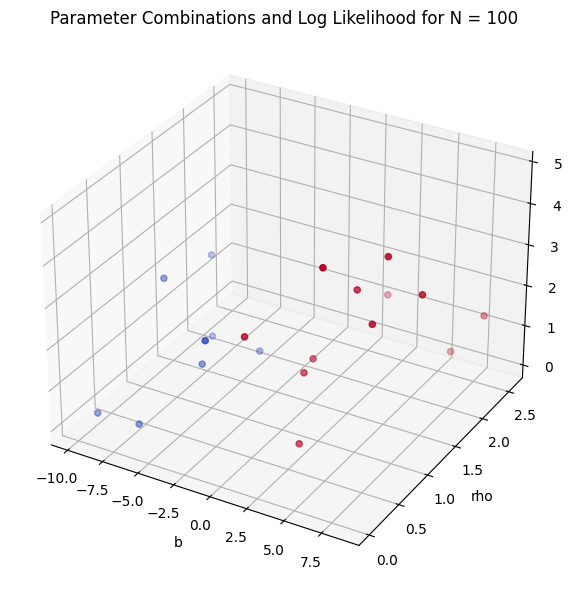

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_log_likelihood_distribution(log_likelihood_values_all, N_values, param_space, num_samples=20):
    plt.figure(figsize=(15, 12))
    param_names = ["b", "rho", "k", "lam"]

    for i, N in enumerate(N_values):
        log_likelihood_values = log_likelihood_values_all[i]

        # Perform random sampling in the parameter space
        b_values = np.random.uniform(param_space[0][0], param_space[0][1], num_samples)
        rho_values = np.random.uniform(param_space[1][0], param_space[1][1], num_samples)
        k_values = np.random.uniform(param_space[2][0], param_space[2][1], num_samples)
        lam_values = np.random.uniform(param_space[3][0], param_space[3][1], num_samples)

        grid_likelihood = np.full(num_samples, fill_value=np.nan, dtype=float)  # Initialize with NaNs

        for j in range(num_samples):
            b = b_values[j]
            rho = rho_values[j]
            k_val = k_values[j]
            lam_val = lam_values[j]

            # Integrate calculation of A, B, and Z_inf for each set of parameter values
            A, B = estimate_moments(t_0, t_M, delta, dt, b, rho, c_true, q_true, k_val, lam_val, N, num_samples=20, seed=None)
            t_values = np.linspace(t_0, t_M, M)
            Z_inf = exact_asymptotic_moment(t_values, dt, b, rho, c_true, k_val, lam_val)
            grid_likelihood[j] = log_likelihood([b, rho, k_val, lam_val], N, A, B, Z_inf, M)

        # Replace NaN values with a large negative value
        grid_likelihood[np.isnan(grid_likelihood)] = -1e10

        # Reshape the arrays to 2D for surface plot
        grid_b_2d = b_values
        grid_rho_2d = rho_values
        grid_likelihood_2d = grid_likelihood

        # Plot the 3D surface of log likelihood distribution
        ax = plt.subplot(2, 2, i + 1, projection='3d')
        ax.plot_trisurf(grid_b_2d, grid_rho_2d, grid_likelihood_2d, cmap="coolwarm")
        ax.set_xlabel("b")
        ax.set_ylabel("rho")
        ax.set_zlabel("Log Likelihood")
        ax.set_title(f"Log Likelihood Distribution for N = {N}")

        # Plot the 4D scatter plot for parameter combinations and log likelihood values
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(grid_b_2d, grid_rho_2d, k_values, c=grid_likelihood_2d, cmap="coolwarm")
        ax.set_xlabel("b")
        ax.set_ylabel("rho")
        ax.set_zlabel("k")
        ax.set_title(f"Parameter Combinations and Log Likelihood for N = {N}")

    plt.tight_layout()
    plt.show()


# Perform parameter estimation and store log likelihood values for all N values
log_likelihood_values_all = []
N_values = [10, 50, 100]

for N in N_values:
    _, _, _, _, log_likelihood_values = perform_parameter_estimation([N], num_simulations)
    log_likelihood_values_all.append(log_likelihood_values[0])  # Extract log likelihood values for this N

# Plot the log likelihood distribution
plot_log_likelihood_distribution(log_likelihood_values_all, N_values, param_space, num_samples=20)


In [ ]:
estimated_parameters, _, _, _, log_likelihood_values = perform_parameter_estimation([N], num_simulations)
print(estimated_parameters, log_likelihood_values)

[array([8.39116833, 1.35452188, 1.61274858, 1.07003502])] [-4833.7530871783765]


In [ ]:
M = 60
A_true, B_true = estimate_moments(t_0, t_M, delta, dt, k_true, b_true, c_true, q_true, rho_true, lam_true, N, num_samples=20)  # Reduced num_samples for faster runtime
t_values = np.linspace(t_0, t_M, M)
Z_inf_true = exact_asymptotic_moment(t_values, dt, k_true, b_true, c_true, rho_true, lam_true)
A, B = estimate_moments(t_0, t_M, delta, dt, 2, 0.6, c_true, q_true, 1.1, 1, N, num_samples=20)
Z_inf = exact_asymptotic_moment(t_values, dt, 2, 0.6, c_true, 1.61, 1.07)

print(log_likelihood(theta_star,50,A_true,B_true,Z_inf_true,M))
print(log_likelihood([2,1.35,1.1,1],50,A,B,Z_inf,M))

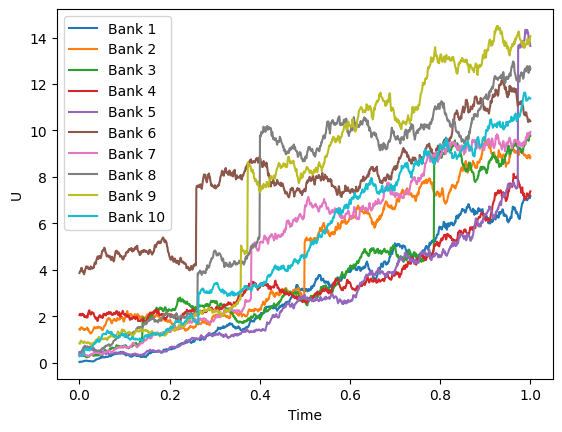

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interbank_lending_model_jumps(N, k, b, c, q, rho, T, dt, lam, gamma, eta):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1 / lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t - 1]) - U[n, t - 1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t - 1]) * dt + q * np.sqrt(np.abs(U[n, t - 1])) * dW[n, t - 1]

            # Determine the number of common jumps that occur at this time step
            num_jumps = np.random.poisson(N * eta * dt)
            if num_jumps > 0:
                jump_size = gamma * U[n, t - 1]  # Jump size for each bank
                dU += num_jumps * jump_size

            U[n, t] = U[n, t - 1] + dU + rho * U[n, t - 1] * dt

    return U

# Parameters
N = 10  # Number of banks
k = 1.1
b = 2
c = 1
q = 1
rho = 0.3
T = 1
dt = 0.001
lam = 1  # Exponential distribution parameter
gamma = 0.8  # Factor by which U jumps in case of a common jump
eta = 0.1  # Intensity of the common jump process

# Simulate interbank lending model with gamma * U_{t-} * dJ integration
U = interbank_lending_model_jumps(N, k, b, c, q, rho, T, dt, lam, gamma, eta)

# Plot results
t = np.linspace(0, T, int(T / dt))
for n in range(N):
    plt.plot(t, U[n], label=f"Bank {n+1}")

plt.xlabel("Time")
plt.ylabel("U")
plt.legend()
plt.show()


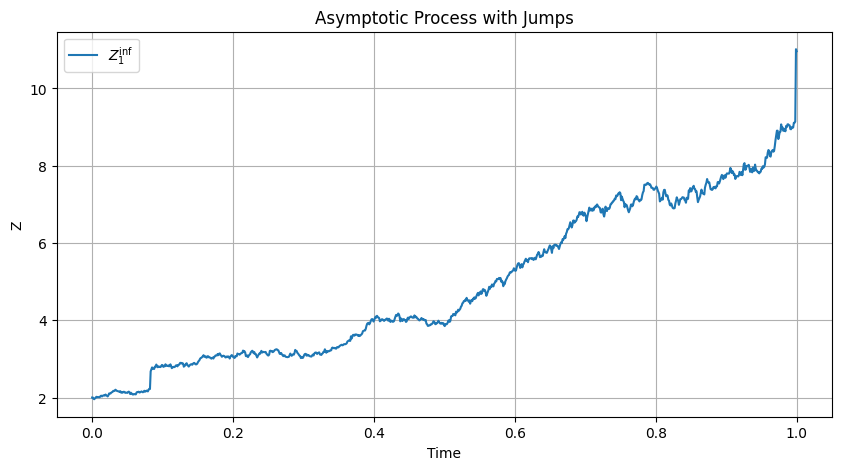

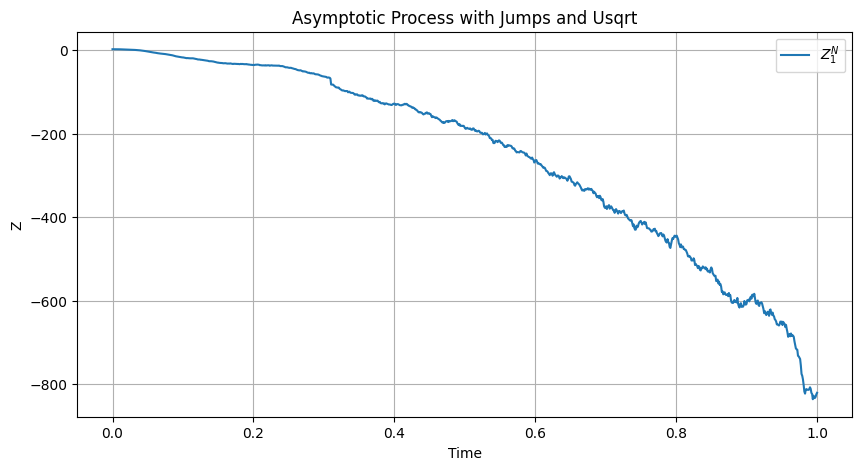

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, T, dt, N, eta):
    num_steps = int(T / dt)
    Z = np.zeros(num_steps)
    Z[0] = 1/lam  # Initial value of Z

    dW_mf = np.sqrt(dt) * np.random.randn(num_steps)
    dJ_mf = poisson.rvs(N * eta * dt, size=num_steps)


    for t in range(1, num_steps):
        Z[t] = Z[t - 1] + (k + b * Z[t - 1] - c * Z[t - 1]) * dt + rho * Z[t - 1] * dW_mf[t] + gamma * Z[t - 1] * dJ_mf[t]

    return Z

def Usqrt(N, k, b, c, q, rho, T, dt, lam, gamma, eta):
    num_steps = int(T / dt)
    dW_mf = np.sqrt(dt) * np.random.randn(N, num_steps)  # Matrix of Brownian motion increments
    Usqrt = np.zeros((N, num_steps))  # Initialize as an array of zeros

    U = interbank_lending_model_jumps(N, k, b, c, q, rho, T, dt, lam, gamma, eta)

    for n in range(N):
        for t in range(1, num_steps):
            Usqrt[n, t] = Usqrt[n, t - 1] + q / N * np.sqrt(U[n, t - 1]) * dW_mf[n, t - 1]

    return Usqrt




def Z1_N_func(k, b, c, q, rho, lam, gamma, T, dt, N, eta):
    num_steps = int(T / dt)
    Z = np.zeros(num_steps)
    Z[0] = 1 / lam  # Initial value of Z

    dW_mf = np.sqrt(dt) * np.random.randn(num_steps)
    dJ_mf = poisson.rvs(N * eta * dt, size=num_steps)
    Usqrt_values = Usqrt(N, k, b, c, q, rho, T, dt, lam, gamma, eta)  # Matrix of Usqrt values

    for t in range(1, num_steps):
        Z[t] = Z[t - 1] + (k + b * Z[t - 1] - c * Z[t - 1]) * dt + rho * Z[t - 1] * dW_mf[t] + gamma * Z[t - 1] * dJ_mf[t] + np.sum(Usqrt_values[:, t - 1])

    return Z

# Parameters
k = 1
b = 2
c = 1
q = 1
rho = 0.3
gamma = 0.2
T = 1.0
dt = 0.001
lam = 0.5
N = 10  # Number of banks
eta = 0.1  # Jump intensity for each individual bank

# Simulate the asymptotic process with jumps
Z1 = asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, T, dt, N, eta)
Z1_N = Z1_N_func(k, b, c, q, rho, lam, gamma, T, dt, N, eta)

# Plot the first result: Asymptotic Process with Jumps
plt.figure(figsize=(10, 5))
plt.plot(t, Z1, label="$Z_1^{\inf}$")
plt.xlabel("Time")
plt.ylabel("Z")
plt.legend()
plt.title("Asymptotic Process with Jumps")
plt.grid(True)
plt.show()

# Plot the second result: Asymptotic Process with Jumps and Usqrt
plt.figure(figsize=(10, 5))
plt.plot(t, Z1_N, label="$Z_1^N$")
plt.xlabel("Time")
plt.ylabel("Z")
plt.legend()
plt.title("Asymptotic Process with Jumps and Usqrt")
plt.grid(True)
plt.show()



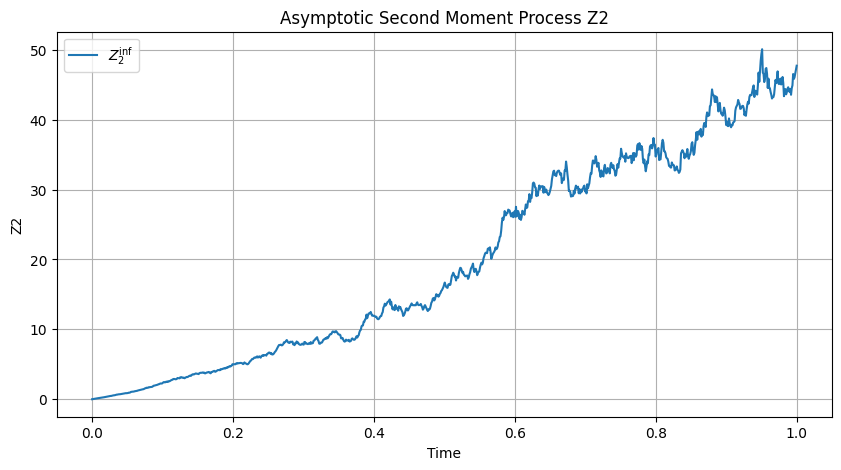

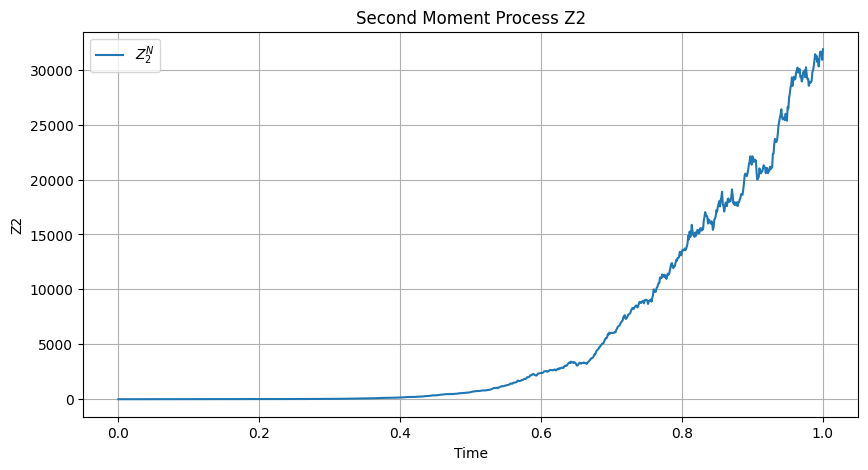

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

def asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, T, dt, N, eta):
    num_steps = int(T / dt)
    Z1 = np.zeros(num_steps)
    Z1[0] = 1 / lam  # Initial value of Z1

    dW_mf = np.sqrt(dt) * np.random.randn(num_steps)
    dJ_mf = poisson.rvs(N * eta * dt, size=num_steps)

    for t in range(1, num_steps):
        Z1[t] = Z1[t - 1] + (k + b * Z1[t - 1] - c * Z1[t - 1]) * dt + rho * Z1[t - 1] * dW_mf[t - 1] + gamma * Z1[t - 1] * dJ_mf[t]

    return Z1



def Z2_solver(k, b, c, q, rho, gamma, lam, N, eta, T, dt):
    num_steps = int(T / dt)
    Z2 = np.zeros(num_steps)
    Z1 = asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, T, dt, N, eta)

    dW = np.sqrt(dt) * np.random.randn(num_steps)
    dJ = np.diff(Z1)

    for t in range(1, num_steps):
        deltaZ1 = dJ[t - 1]
        Z2[t] = Z2[t - 1] + 2 * (k + b * Z1[t - 1]) * Z1[t - 1] * dt - 2 * c * Z2[t - 1] * dt + (q ** 2 * Z1[t - 1] + rho ** 2 * Z2[t - 1]) * dt + 2 * rho * Z2[t - 1] * dW[t] + gamma * deltaZ1

    return Z2

def Z2_N_func(k, b, c, q, rho, gamma, lam, N, eta, T, dt):
    num_steps = int(T / dt)
    Z2 = np.zeros(num_steps)
    Z1 = Z1_N_func(k, b, c, q, rho, lam, gamma, T, dt, N, eta)  # Using the Z1_N_func you defined earlier

    dW = np.sqrt(dt) * np.random.randn(num_steps)
    dJ = np.diff(Z1)

    for t in range(1, num_steps):
        deltaZ1 = dJ[t - 1]
        Z2[t] = Z2[t - 1] + 2 * (k + b * Z1[t - 1]) * Z1[t - 1] * dt - 2 * c * Z2[t - 1] * dt + (q ** 2 * Z1[t - 1] + rho ** 2 * Z2[t - 1]) * dt + 2 * rho * Z2[t - 1] * dW[t] + gamma * deltaZ1

        # Calculate the additional term using Usqrt values
        U_t_n = interbank_lending_model_jumps(N, k, b, c, q, rho, T, dt, lam, gamma, eta)[:, t]
        dW_t_n = np.sqrt(dt) * np.random.randn(N)
        additional_term = 1 / N * np.sum(2 * q * np.sqrt(U_t_n) ** (3/2) * dW_t_n)
        Z2[t] += additional_term

    return Z2

# Parameters
k = 1
b = 1.4
c = 1
q = 1
rho = 0.3
gamma = 0.1
T = 1.0
dt = 0.001
lam = 0.5
N = 100  # Number of banks
eta = 0.1  # Jump intensity for each individual bank

# Simulate the Z2 process
Z2 = Z2_solver(k, b, c, q, rho, gamma, lam, N, eta, T, dt)
Z2_N = Z2_N_func(k, b, c, q, rho, gamma, lam, N, eta, T, dt)

# Plot the results
t = np.linspace(0, T, int(T / dt))
plt.figure(figsize=(10, 5))
plt.plot(t, Z2, label="$Z_2^{\inf}$")
plt.xlabel("Time")
plt.ylabel("Z2")
plt.legend()
plt.title("Asymptotic Second Moment Process Z2")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, Z2_N, label="$Z_2^N$")
plt.xlabel("Time")
plt.ylabel("Z2")
plt.legend()
plt.title("Second Moment Process Z2")
plt.grid(True)
plt.show()


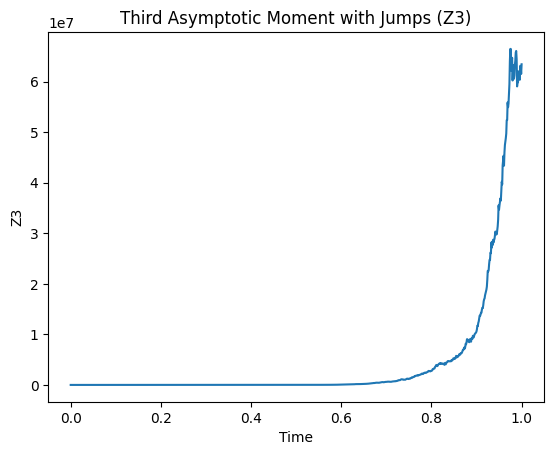

In [ ]:
def Z3_solver(k, b, c, q, rho, lam, N, eta, gamma, T, dt):
    num_steps = int(T / dt)
    Z3 = np.zeros(num_steps)
    Z1 = asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, T, dt, N, eta)
    Z2 = Z2_solver(k, b, c, q, rho, gamma, lam, N, eta, T, dt)

    dW = np.sqrt(dt) * np.random.randn(num_steps)
    Z3[0] = 6*(Z1[0])**3
    for t in range(1, num_steps):
        Z3[t] = Z3[t - 1] + (3 * (k + q ** 2 + b * Z1[t - 1]) * Z2[t - 1] + 3 * (rho ** 2 - c) * Z3[t - 1]) * dt + 3 * rho * Z3[t - 1] * dW[t]

    return Z3

# Parameters
k = 1
b = 2
c = 1
q = 1
rho = 0.3
gamma = 0.5
lam = 0.5
N = 100  # Number of banks
eta = 0.1  # Jump intensity for each individual bank
T = 1.0
dt = 0.001

# Simulate Z3
Z3 = Z3_solver(k, b, c, q, rho, lam, N, eta, gamma, T, dt)

# Plot the results
t = np.linspace(0, T, int(T / dt))
plt.plot(t, Z3)
plt.xlabel("Time")
plt.ylabel("Z3")
plt.title("Third Asymptotic Moment with Jumps (Z3)")
plt.show()

In [ ]:
import numpy as np

def Psi_solver(s, t, k, b, q, rho, f_mu, dX):
    dt = t - s

    # Define the matrix
    matrix_elements = np.array([
        [k + b / N * f_mu, b],
        [0, q**2 + 2*k + 4*b*f_mu]
    ])

    # Discretize the time interval
    num_steps = 100  # You can adjust the number of steps
    dt_discrete = dt / num_steps

    # Initialize Psi
    Psi_st = np.identity(2)

    # Define the constant term with the correct shape
    constant_term = np.array([rho * np.sqrt(dt_discrete), 2*rho * np.sqrt(dt_discrete)])

    # Iterate to update Psi using Euler's method
    for m in range(len(dX)):
        Psi_st += np.dot(matrix_elements, Psi_st) * dt_discrete + constant_term * dX[m][0]

    return Psi_st




In [ ]:
def B_matrix(Z1, Z2, Z3, q):
    B = np.array([[q ** 2 * Z1, 2 * q ** 2 * Z2],
                  [2 * q ** 2 * Z2, 4 * q ** 2 * Z3]])
    return B

# Parameters
q = 1
# Simulated Z1, Z2, and Z3
Z1 = asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, T, dt, N, eta)
Z2 = Z2_solver(k, b, c, q, rho, gamma, lam, N, eta, T, dt)
Z3 = Z3_solver(k, b, c, q, rho, lam, N, eta, gamma, T, dt)

# Compute B matrix
B = B_matrix(Z1, Z2, Z3, q)

<ipython-input-11-505f26a4489e>:106: RuntimeWarning: invalid value encountered in log
  L1 += np.log(10**(-10) + np.sqrt(N) / (B_diag[0] + 10**(-10)) * stats.norm.cdf(np.sqrt(N) * (Z1[m] - A[m][0]) / (B_diag[0] + 10**(-10))))
<ipython-input-11-505f26a4489e>:107: RuntimeWarning: invalid value encountered in log
  L2 += np.log(10**(-10) + np.sqrt(N) / (B_diag[1] + 10**(-10)) * stats.norm.cdf(np.sqrt(N) * (Z2[m] - A[m][1]) / (B_diag[1] + 10**(-10))))
<ipython-input-6-1cb5e1d75d7b>:28: RuntimeWarning: invalid value encountered in sqrt
  Usqrt[n, t] = Usqrt[n, t - 1] + q / N * np.sqrt(U[n, t - 1]) * dW_mf[n, t - 1]
<ipython-input-7-628d6d31946e>:49: RuntimeWarning: invalid value encountered in sqrt
  additional_term = 1 / N * np.sum(2 * q * np.sqrt(U_t_n) ** (3/2) * dW_t_n)


Estimation Results:
N	Parameter	Mean Estimate	MSE		Mean Error	Standard Deviation
10	b		0.504915778708057	1.6395678784675223	0.40491577870805706	1.5147473361241717
10	rho		0.059509281327866606	0.0038061205792984444	0.019509281327866602	0.17852784398359978
10	k		0.0614790615506523	0.026500937781358487	0.05147906155065231	0.1844371846519569
10	lam		0.37852111881826705	1.0792612550960594	0.32852111881826707	1.1355633564548013
10	gamma		0.4729429655894363	1.9619847076516461	0.44294296558943635	1.4188288967683091
10	eta		0.008647060126353046	0.0005847752857605867	0.007647060126353046	0.025941180379059132
50	b		0.0	0.0	0.0	0.0
50	rho		0.0	0.0	0.0	0.0
50	k		0.0	0.0	0.0	0.0
50	lam		0.0	0.0	0.0	0.0
50	gamma		0.0	0.0	0.0	0.0
50	eta		0.0	0.0	0.0	0.0
100	b		0.9872856422665276	7.872758109723243	0.8872856422665276	2.9618569267995833
100	rho		0.03816583155242072	3.364173894095413e-05	-0.0018341684475792874	0.11449749465726212
100	k		0.13576037173232064	0.15815671098251466	0.12576037173232063	0.4072811

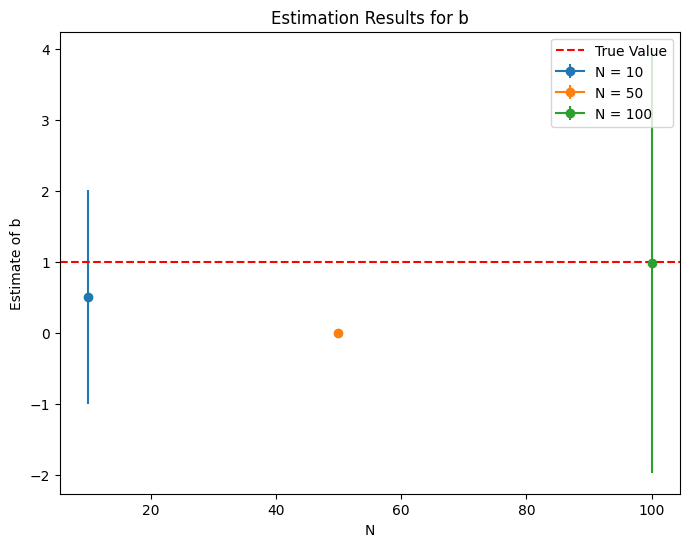

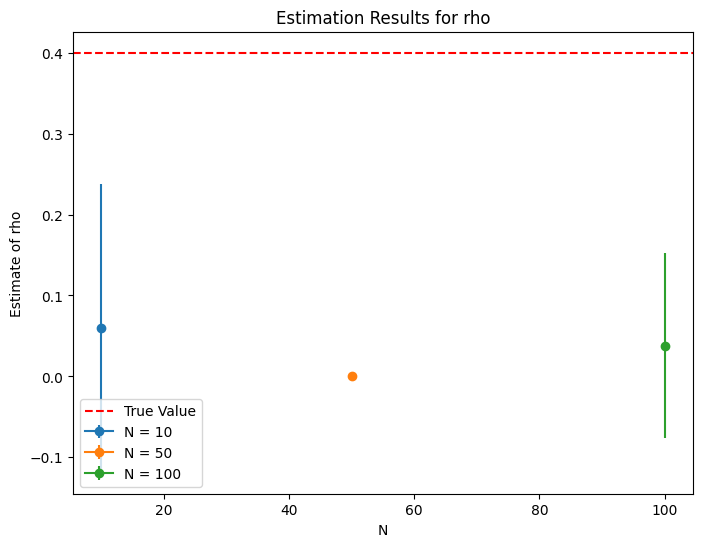

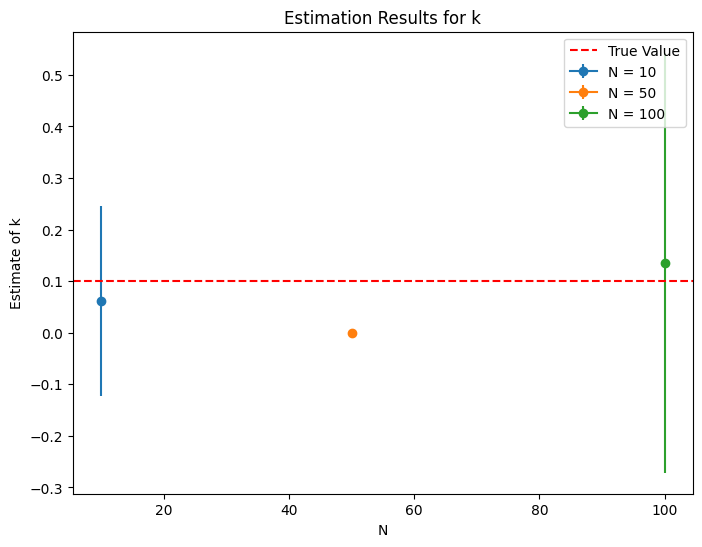

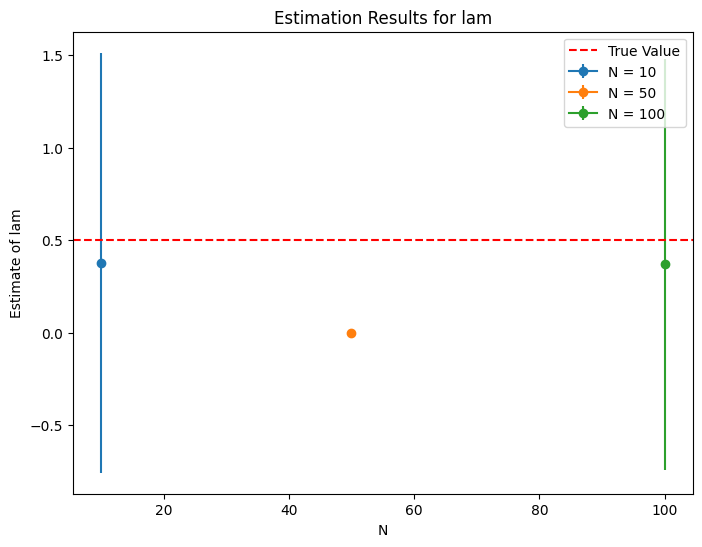

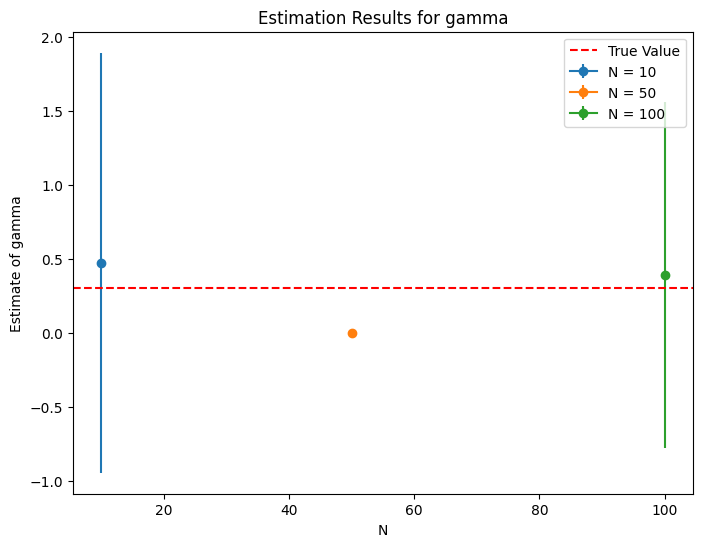

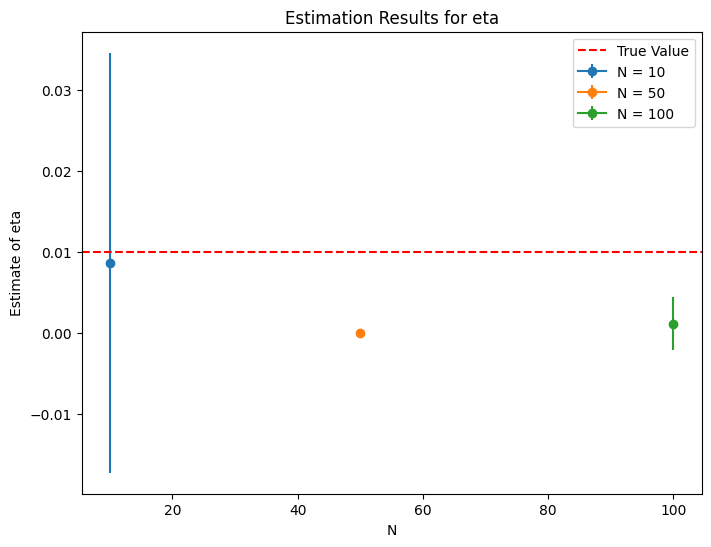

In [ ]:
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import math

# Define the true parameter values (including gamma and eta)
c_true = 1
q_true = 1
b_true = 1  # Updated true parameter value for b
rho_true = 0.4  # Updated true parameter value for rho
k_true = 0.1  # Updated true parameter value for k
lam_true = 0.5  # Updated true parameter value for lam
gamma_true = 0.3  # Updated true parameter value for gamma
eta_true = 0.01  # Updated true parameter value for eta
theta_star = [b_true, rho_true, k_true, lam_true, gamma_true, eta_true]
t_0 = 0.1  # Initial time
t_M = 5.1  # Final time
delta = 1/12  # Time step for moments
M = int(np.ceil((t_M - t_0) / delta))  # Number of intervals

# Define the parameter space (including gamma and eta)
param_space = [(-10, 10), (0, 3), (0, 5), (10**(-5), 5), (0, 5), (0, 0.1)]  # [b, rho, k, lam, gamma, eta]

def brownian_motion(t_M_values, dt, num_paths=1, seed=None):
    num_steps = int(np.ceil(np.max(t_M_values) / dt))

    if seed is not None:  # Set the random seed if provided
        np.random.seed(seed)

    dX = np.sqrt(dt) * np.random.randn(num_paths, num_steps, len(t_M_values))
    dX[:, :, 0] = 0  # First element of each path is set to 0
    X = np.cumsum(dX, axis=1)

    return X



def integrand(s, t_values, b, c, rho):
    t_values = t_values[:, None]
    X_t = brownian_motion(t_values, dt)[:, -1][:, None]
    X_s = brownian_motion(s, dt)[:, -1]
    return np.exp((b - c - 1/2 * rho**2) * (t_values - s) + rho * (X_t - X_s))


def monte_carlo_integration(integrand_values, delta):
    num_samples = len(integrand_values)
    integral_value = np.mean(integrand_values) * delta
    return integral_value

def estimate_moments(t_0, t_M, delta, dt, k, b, c, q, rho, lam, gamma, eta, N, num_samples, X_t_all, seed=None):
    np.random.seed(seed)  # Set the random seed for reproducibility

    M = int(np.ceil((t_M - t_0) / delta))  # Number of intervals
    t_values = np.linspace(t_0, t_M, M)

    first_moment = []
    second_moment = []

    X_t_all = brownian_motion(t_values, dt, num_paths=num_samples, seed=seed)

    # Define the 3 moments
    Z1 = asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, t_M-t_0, delta, N, eta)
    Z2 = Z2_solver(k, b, c, q, rho, gamma, lam, N, eta, t_M-t_0, delta)
    Z3 = Z3_solver(k, b, c, q, rho, lam, N, eta, gamma, t_M-t_0, delta)

    for i, t in enumerate(t_values[2:], start=2):  # Start from 2 to ensure proper indexing
        # Calculate the empirical Z1 and Z2 values
        Z1_N = Z1_N_func(k, b, c, q, rho, lam, gamma, t_M-t_0, delta, N, eta)
        Z2_N = Z2_N_func(k, b, c, q, rho, gamma, lam, N, eta, t_M-t_0, delta)

        # Calculate AmN for Z1 and Z2
        AmN = np.array([
            Z1_N[i-1] + (Z1[i-1] - Z1[i-2]),
            Z2_N[i-1] + (Z2[i-1] - Z2[i-2])
        ])

        # Calculate BmN_squared for Z1 and Z2
        Psi_t_m_1 = Psi_solver(t_values[i-2], t_values[i-1], k, b, q, rho, Z1_N[i-2], X_t_all[:, i-2])
        Psi_t_m = Psi_solver(t_values[i-1], t, k, b, q, rho, Z1_N[i-1], X_t_all[:, i-1])

        B_matrix_t_m_1 = B_matrix(Z1[i-2], Z2[i-2], Z3[i-2], q)
        B_matrix_t_m = B_matrix(Z1[i-1], Z2[i-1], Z3[i-1], q)

        integral_term = monte_carlo_integration(np.dot(np.linalg.inv(Psi_t_m_1), np.dot(B_matrix_t_m_1, np.linalg.inv(Psi_t_m_1).T)), delta)

        BmN_squared = np.dot(Psi_t_m, np.dot(integral_term, Psi_t_m.T))
        BmN_squared_diag = np.diag(BmN_squared)  # Convert to diagonal matrix with zeros

        first_moment.append(AmN)
        second_moment.append(BmN_squared_diag)

    first_moment = np.array(first_moment)
    second_moment = np.array(second_moment)

    return first_moment, second_moment


def log_likelihood(theta, N, A, B_list, Z1, Z2, M):
    b, rho, k, lam, gamma, eta = theta  # Include gamma and eta in the theta vector
    L1, L2 = 0, 0  # Separate likelihood terms for Z1 and Z2
    for m in range(1, M-2):
        B = B_list[m]  # Get the diagonal matrix B for the current time step
        B_diag = np.diag(B)  # Extract the diagonal elements of B
        L1 += np.log(10**(-10) + np.sqrt(N) / (B_diag[0] + 10**(-10)) * stats.norm.cdf(np.sqrt(N) * (Z1[m] - A[m][0]) / (B_diag[0] + 10**(-10))))
        L2 += np.log(10**(-10) + np.sqrt(N) / (B_diag[1] + 10**(-10)) * stats.norm.cdf(np.sqrt(N) * (Z2[m] - A[m][1]) / (B_diag[1] + 10**(-10))))

    return -(L1.sum() + L2.sum())  # Sum of L1 and L2


def perform_parameter_estimation(t_values, num_samples, dt, N_values, num_simulations=10, seed=None):
    mean_estimates = []
    mse_values = []
    mean_errors = []
    std_devs = []
    X_t_all = brownian_motion(t_values, dt, num_paths=num_samples, seed=seed)

    for N in N_values:
        estimates = np.zeros((num_simulations, len(param_space)))
        mse = np.zeros(len(param_space))
        mean_error = np.zeros(len(param_space))
        log_likelihood_values = []

        # Initialize llv to None
        llv = None

        for sim in range(num_simulations):
            seed = sim  # Use the simulation index as the seed value
            initial_theta = np.array([np.random.uniform(low, high) for (low, high) in param_space])
            A, B = estimate_moments(t_0, t_M, delta, dt, initial_theta[0], initial_theta[1], c_true, q_true, initial_theta[2], initial_theta[3], initial_theta[4], initial_theta[5], N, 20, X_t_all=X_t_all, seed=seed)
            t_values = np.linspace(t_0, t_M, M)
            Z1 = asymptotic_process_with_jumps(k, b, c, rho, lam, gamma, t_M-t_0, dt, N, eta)
            Z2 = Z2_solver(k, b, c, q, rho, gamma, lam, N, eta, t_M-t_0, dt)
            objective_func = lambda params: log_likelihood(params, N, A, B, Z1, Z2, M)
            bounds = tuple(param_space)  # Use the parameter space as bounds
            result = optimize.minimize(objective_func, initial_theta, method="L-BFGS-B", bounds=bounds, tol=1e-4)
            if result.success:
                estimated_theta = result.x
                llv = -result.fun
                estimates[sim] = estimated_theta
                mse += (estimated_theta - theta_star) ** 2
                mean_error += estimated_theta - theta_star

        if llv is not None:
            log_likelihood_values.append(llv / num_simulations)
        else:
            log_likelihood_values.append(np.nan)

        mean_estimates.append(np.mean(estimates, axis=0))
        mse_values.append(mse / num_simulations)
        mean_errors.append(mean_error / num_simulations)
        std_devs.append(np.std(estimates, axis=0))

    return mean_estimates, mse_values, mean_errors, std_devs, log_likelihood_values


# Define the number of simulations and different N values
num_simulations = 10
N_values = [10, 50, 100]
t_values = np.linspace(t_0, t_M, M)
# Perform parameter estimation
mean_estimates, mse_values, mean_errors, std_devs, log_likelihood_values = perform_parameter_estimation(
    t_values, num_samples=num_simulations, dt=delta, N_values=N_values)

# Print the estimation results
print("Estimation Results:")
print("N\tParameter\tMean Estimate\tMSE\t\tMean Error\tStandard Deviation")
for i, N in enumerate(N_values):
    for j, param in enumerate(["b", "rho", "k", "lam", "gamma", "eta"]):
        print(f"{N}\t{param}\t\t{mean_estimates[i][j]}\t{mse_values[i][j]}\t{mean_errors[i][j]}\t{std_devs[i][j]}")

# Plot the estimation results
param_names = ["b", "rho", "k", "lam", "gamma", "eta"]
for i, param in enumerate(param_names):
    plt.figure(figsize=(8, 6))
    for j, N in enumerate(N_values):
        plt.errorbar(
            [N],
            [mean_estimates[j][i]],
            yerr=[std_devs[j][i]],
            marker="o",
            label=f"N = {N}",
        )
    plt.axhline(y=theta_star[i], color="red", linestyle="--", label="True Value")
    plt.xlabel("N")
    plt.ylabel(f"Estimate of {param}")
    plt.title(f"Estimation Results for {param}")
    plt.legend()
    plt.show()

Bank 1 defaulted at time 0.01
Bank 2 defaulted at time 0.01
Bank 3 defaulted at time 0.01
Bank 4 defaulted at time 0.01
Bank 5 defaulted at time 0.01
Bank 6 defaulted at time 0.01
Bank 7 defaulted at time 0.01
Bank 8 defaulted at time 0.01
Bank 9 defaulted at time 0.01
Bank 1 defaulted at time 0.02
Bank 2 defaulted at time 0.02
Bank 3 defaulted at time 0.02
Bank 4 defaulted at time 0.02
Bank 5 defaulted at time 0.02
Bank 6 defaulted at time 0.02
Bank 7 defaulted at time 0.02
Bank 8 defaulted at time 0.02
Bank 9 defaulted at time 0.02
Bank 1 defaulted at time 0.03
Bank 2 defaulted at time 0.03
Bank 3 defaulted at time 0.03
Bank 4 defaulted at time 0.03
Bank 5 defaulted at time 0.03
Bank 6 defaulted at time 0.03
Bank 7 defaulted at time 0.03
Bank 8 defaulted at time 0.03
Bank 9 defaulted at time 0.03
Bank 2 defaulted at time 0.04
Bank 3 defaulted at time 0.04
Bank 4 defaulted at time 0.04
Bank 5 defaulted at time 0.04
Bank 6 defaulted at time 0.04
Bank 7 defaulted at time 0.04
Bank 8 def

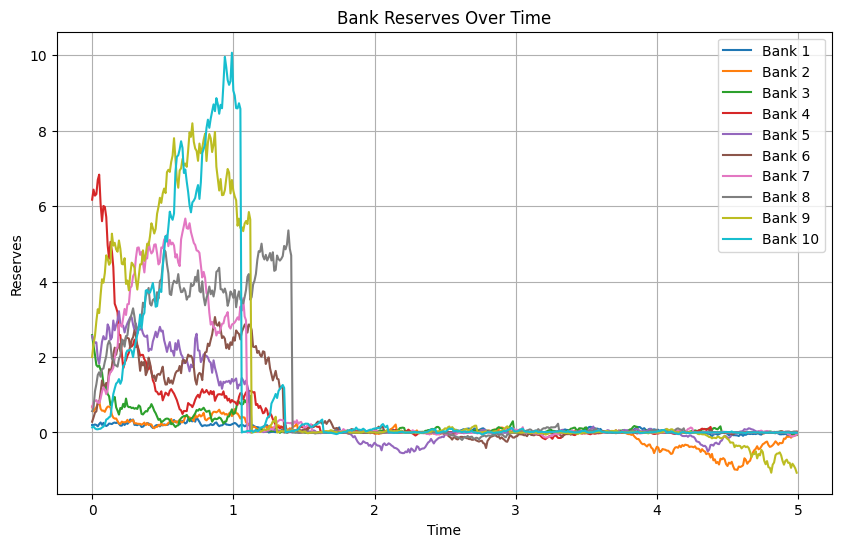

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interbank_lending_model_jumps_defaults(N, k, b, c, q, rho, T, dt, lam, gamma, eta, xi, zeta, eviction_threshold):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1 / lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t - 1]) - U[n, t - 1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t - 1]) * dt + q * np.sqrt(np.abs(U[n, t - 1])) * dW[n, t - 1]

            # Determine the number of common jumps that occur at this time step
            num_jumps = np.random.poisson(N * eta * dt)
            if num_jumps > 0:
                jump_size = gamma * U[n, t - 1]  # Jump size for each bank
                dU += num_jumps * jump_size

            U[n, t] = U[n, t - 1] + dU + rho * U[n, t - 1] * dt

            # Calculate default probability based on U_n and threshold zeta
            default_prob = max(0, (U[n, t] - zeta) / (xi - zeta))

            # Bank default logic
            if default_prob > np.random.rand():
                # Default occurred
                print(f"Bank {n+1} defaulted at time {t*dt}")
                # Introduce stopping time (eviction)
                stopping_time = np.random.randint(eviction_threshold, num_steps)
                if t >= stopping_time:
                    U[n, t:] = 0  # Set reserves to 0 after defaulting
                else:
                    # Allow other banks with U_n > xi to provide assistance
                    assisting_banks = [i for i in range(N) if i != n and U[i, t] > xi]
                    if assisting_banks:
                        # Randomly select assisting banks and provide assistance
                        assisting_bank = np.random.choice(assisting_banks)
                        assistance_amount = np.random.uniform(0, 0.1 * U[assisting_bank, t])  # Adjust the percentage as needed
                        U[assisting_bank, t] -= assistance_amount
                        U[n, t] += assistance_amount

    return U

# Parameters
N = 10
k = 0.1
b = 1.0
c = 1.0
q = 0.2
rho = 0.1
T = 5.0
dt = 0.01
lam = 0.5
gamma = 0.3
eta = 0.01
xi = 0.2  # Threshold for assisting banks
zeta = 0.1  # Default threshold
eviction_threshold = 100  # Minimum time before eviction for defaulting banks

# Run the model
U = interbank_lending_model_jumps_defaults(N, k_true, b_true, c_true, q_true, rho_true, T, dt, lam_true, gamma_true, eta_true, xi, zeta, eviction_threshold)

# Plotting
plt.figure(figsize=(10, 6))
for n in range(N):
    plt.plot(np.arange(0, T, dt), U[n], label=f"Bank {n+1}")

plt.xlabel("Time")
plt.ylabel("Reserves")
plt.title("Bank Reserves Over Time")
plt.legend()
plt.grid(True)
plt.show()



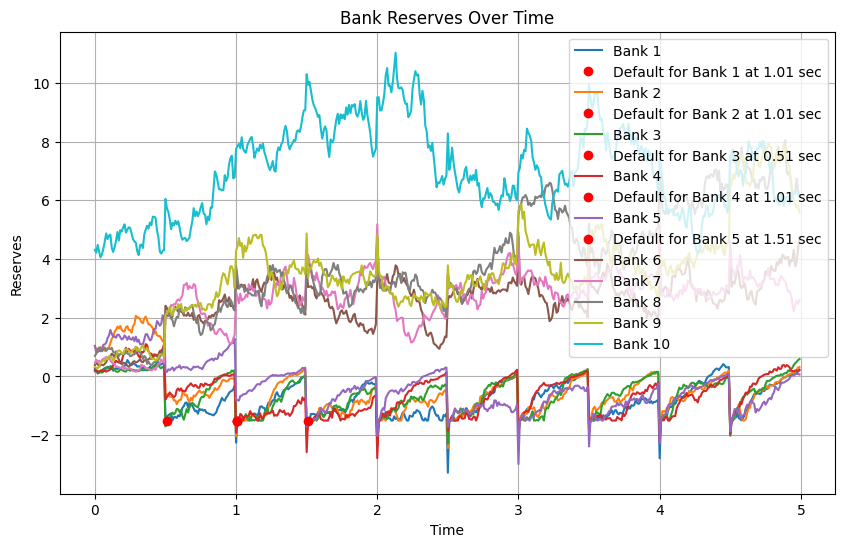

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def interbank_lending_model_rescue(N, k, b, c, q, rho, T, dt, lam, gamma, eta, xi, zeta, eviction_threshold):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1 / lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    default_times = np.full(N, -1)  # Initialize with -1, meaning no default has occurred for any bank

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t - 1]) - U[n, t - 1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t - 1]) * dt + q * np.sqrt(np.abs(U[n, t - 1])) * dW[n, t - 1]

            # Determine the number of common jumps that occur at this time step
            num_jumps = np.random.poisson(N * eta * dt)
            if num_jumps > 0:
                jump_size = gamma * U[n, t - 1]  # Jump size for each bank
                dU += num_jumps * jump_size

            U[n, t] = U[n, t - 1] + dU + rho * U[n, t - 1] * dt

            if default_times[n] == -1 and U[n, t] <= zeta:
                default_times[n] = t  # Record default time for bank n

        # Assist defaulting banks with strong banks if needed
        for n in range(N):
            if default_times[n] != -1 and t >= eviction_threshold:
                for m in range(N):
                    if U[m, t] > xi and U[n, t] < 0:  # Only assist if bank n is in default
                        amount_to_assist = max(0, zeta - U[n, t])
                        if amount_to_assist <= U[m, t] - xi:
                            U[n, t:] += amount_to_assist
                            U[m, t:] -= amount_to_assist
                            break

        # Force some banks into default at regular intervals for demonstration purposes
        if t % 50 == 0:
            for n in range(N // 2):
                U[n, t:] -= 2
                U[N // 2 + n, t:] += 1.5  # Boost some banks upwards

    return U, default_times

# Parameters
N = 10
T = 5.0
dt = 0.01
eta = 0.01
xi = 3  # Threshold for strong banks
zeta = -1.5  # Default threshold
eviction_threshold = 50  # Minimum time before eviction for defaulting banks

# Run the model
U, default_times = interbank_lending_model_rescue(N, k_true, b_true, c_true, q_true, rho_true, T, dt, lam_true, gamma_true, eta_true, xi, zeta, eviction_threshold)

# Plotting
plt.figure(figsize=(10, 6))
for n in range(N):
    plt.plot(np.arange(0, T, dt), U[n], label=f"Bank {n+1}")
    if default_times[n] != -1:
        plt.plot(default_times[n] * dt, U[n, default_times[n]], 'ro', label=f"Default for Bank {n+1} at {default_times[n]*dt:.2f} sec")

plt.xlabel("Time")
plt.ylabel("Reserves")
plt.title("Bank Reserves Over Time")
plt.legend()
plt.grid(True)
plt.show()


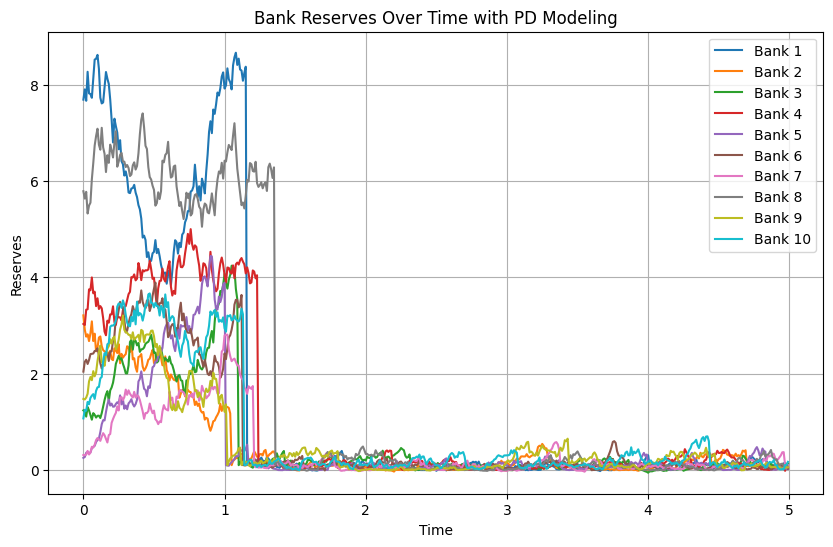

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the interbank lending model function with PD Modeling
def interbank_lending_model_pd(N, k, b, c, q, rho, T, dt, lam, gamma, eta, pd_params):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1 / lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t - 1]) - U[n, t - 1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t - 1]) * dt + q * np.sqrt(np.abs(U[n, t - 1])) * dW[n, t - 1]

            # Determine the number of common jumps that occur at this time step
            num_jumps = np.random.poisson(N * eta * dt)
            if num_jumps > 0:
                jump_size = gamma * U[n, t - 1]  # Jump size for each bank
                dU += num_jumps * jump_size

            U[n, t] = U[n, t - 1] + dU + rho * U[n, t - 1] * dt

            # Calculate probability of default for the bank n
            pd_prob = calculate_pd_prob(U[n, t], pd_params[n])

            # Bank default logic based on PD probability
            if pd_prob > np.random.rand() and t > 100:  # Default after 1 year
                U[n, t] = 0.1  # Resurface with a small amount if reserves went below zero

    return U

# Function to calculate probability of default based on reserves and PD parameters
def calculate_pd_prob(reserves, pd_params):
    pd_base = pd_params['base']
    pd_sensitivity = pd_params['sensitivity']
    pd_prob = pd_base + pd_sensitivity * reserves
    return pd_prob

# Parameters
N = 10
T = 5.0
dt = 0.01
eta = 0.01

# Generate random PD parameters for each bank
np.random.seed(0)  # For reproducibility
pd_params = [{'base': np.random.uniform(0.01, 0.1), 'sensitivity': np.random.uniform(0.001, 0.01)} for _ in range(N)]

# Run the model with PD Modeling
U_with_pd = interbank_lending_model_pd(N, k_true, b_true, c_true, q_true, rho_true, T, dt, lam_true, gamma_true, eta_true, pd_params)

# Plotting
plt.figure(figsize=(10, 6))
for n in range(N):
    plt.plot(np.arange(0, T, dt), U_with_pd[n], label=f"Bank {n+1}")

plt.xlabel("Time")
plt.ylabel("Reserves")
plt.title("Bank Reserves Over Time with PD Modeling")
plt.legend()
plt.grid(True)
plt.show()


The main difference between the code with PD modeling and the previous versions with simple thresholds lies in how the default behavior is determined for each bank. Here's a breakdown of the differences:

1- Probability of Default (PD) Modeling:

In the version with PD modeling, each bank has its own set of PD parameters (base and sensitivity) that determine the probability of default based on its current reserves.
The calculate_pd_prob function uses these parameters to calculate the probability of default for each bank at each time step.
The probability of default is then compared to a random number to decide if a bank should default.
If a bank's PD probability exceeds the random number and the simulation time is beyond a certain threshold (e.g., 1 year), the bank defaults and its reserves are reset to a small positive value.
This approach introduces a probabilistic element to the default behavior, making it more realistic and adaptable to different bank conditions.

2- Threshold-Based Default Logic:

In the previous versions, banks defaulted if their reserves went below a certain threshold value (zeta).
Once their reserves went below the threshold, they were reset to a small positive value.
This approach does not consider the individual characteristics of each bank or their historical behavior. All banks follow the same threshold rule.
The PD modeling approach is more flexible and reflects the real-world scenario better, where the probability of default is influenced by various factors specific to each bank. It allows for a more dynamic and nuanced default behavior, leading to more realistic and diverse simulation outcomes.

In [ ]:
import numpy as np

# Function to simulate the interbank lending model with jumps
def interbank_lending_model_jumps(N, k, b, c, q, rho, T, dt, lam, gamma, eta):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1 / lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t - 1]) - U[n, t - 1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t - 1]) * dt + q * np.sqrt(np.abs(U[n, t - 1])) * dW[n, t - 1]

            # Determine the number of common jumps that occur at this time step
            num_jumps = np.random.poisson(N * eta * dt)
            if num_jumps > 0:
                jump_size = gamma * U[n, t - 1]  # Jump size for each bank
                dU += num_jumps * jump_size

            U[n, t] = U[n, t - 1] + dU + rho * U[n, t - 1] * dt

    return U

# Simulate the interbank lending model with jumps
N = 10
T = 5.0
dt = 0.01
c_true = 1
q_true = 1
b_true = 1  # Updated true parameter value for b
rho_true = 0.4  # Updated true parameter value for rho
k_true = 0.1  # Updated true parameter value for k
lam_true = 0.5  # Updated true parameter value for lam
gamma_true = 0.3  # Updated true parameter value for gamma
eta_true = 0.01  # Updated true parameter value for eta
U_simulations = 1000  # Number of simulations
U_final_reserves = []

for _ in range(U_simulations):
    U = interbank_lending_model_jumps(N, k_true, b_true, c_true, q_true, rho_true, T, dt, lam_true, gamma_true, eta_true)
    U_final_reserves.append(U[:, -1])

# Calculate VaR using Historical Simulation
confidence_level = 0.95
percentile = np.percentile(U_final_reserves, (1 - confidence_level) * 100)
print(f"Historical Simulation VaR at {confidence_level * 100}% confidence level: {percentile}")

# Calculate VaR using Variance-Covariance Method
mean_final_reserves = np.mean(U_final_reserves)
cov_matrix = np.cov(U_final_reserves, rowvar=False)
z_alpha = np.percentile(U_final_reserves, (1 - confidence_level) * 100)
variance_covariance_var = mean_final_reserves - z_alpha
print(f"Variance-Covariance Method VaR at {confidence_level * 100}% confidence level: {variance_covariance_var}")

# Calculate VaR using Monte Carlo Simulation
mean_final_reserves = np.mean(U_final_reserves)
std_dev_final_reserves = np.std(U_final_reserves)
z_score = np.abs(np.percentile(U_final_reserves, (1 - confidence_level) * 100) - mean_final_reserves) / std_dev_final_reserves
mc_var = mean_final_reserves - z_score * std_dev_final_reserves
print(f"Monte Carlo Simulation VaR at {confidence_level * 100}% confidence level: {mc_var}")


Historical Simulation VaR at 95.0% confidence level: 3.873016016042067
Variance-Covariance Method VaR at 95.0% confidence level: 7.775888154271696
Monte Carlo Simulation VaR at 95.0% confidence level: 3.873016016042067


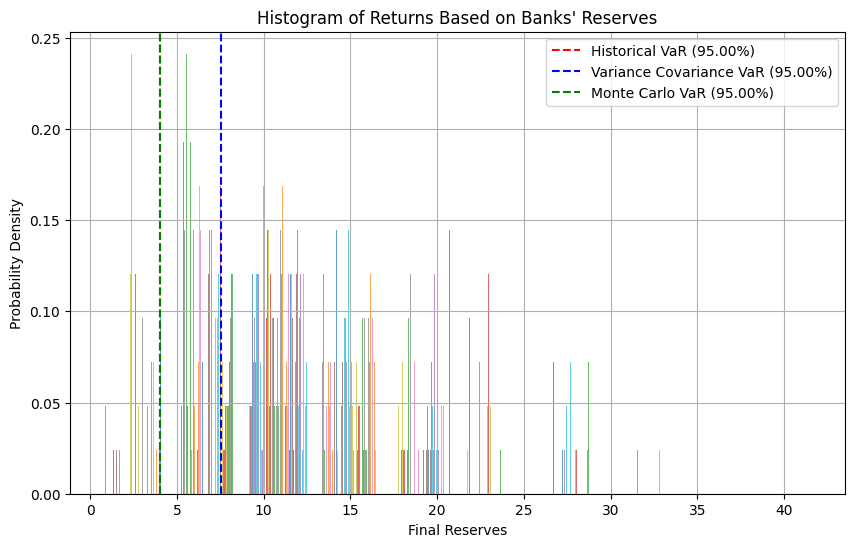

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting histogram of returns based on banks' reserves
plt.figure(figsize=(10, 6))
plt.hist(U_final_reserves, bins=10, density=True, alpha=0.7)
plt.axvline(percentile, color='red', linestyle='dashed', label=f'Historical VaR ({confidence_level*100:.2f}%)')
plt.axvline(variance_covariance_var, color='blue', linestyle='dashed', label=f'Variance Covariance VaR ({confidence_level*100:.2f}%)')
plt.axvline(mc_var, color='green', linestyle='dashed', label=f'Monte Carlo VaR ({confidence_level*100:.2f}%)')
plt.xlabel("Final Reserves")
plt.ylabel("Probability Density")
plt.title("Histogram of Returns Based on Banks' Reserves")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np

# Calculate CVaR using Historical Simulation
threshold = np.percentile(U_final_reserves, (1 - confidence_level) * 100)
losses_exceeding_threshold = [losses[losses < threshold] - threshold for losses in U_final_reserves]
losses_exceeding_threshold = np.concatenate(losses_exceeding_threshold)  # Combine the arrays
cvar = np.mean(losses_exceeding_threshold)
print(f"Historical Simulation CVaR at {confidence_level * 100}% confidence level: {cvar}")



Historical Simulation CVaR at 95.0% confidence level: -1.0318253520007414


Extreme Value Theory VaR at 95.0% confidence level: 45.704915629950925


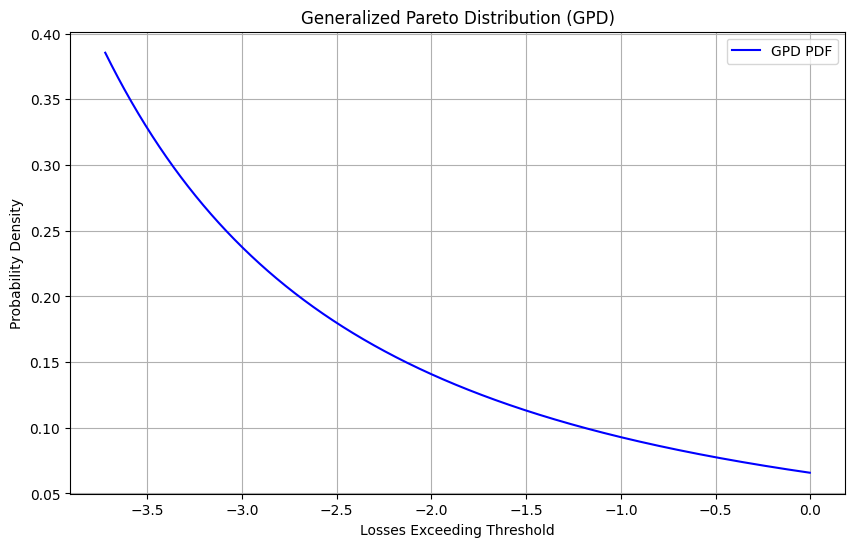

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

# Fit GPD to the tail of the distribution
threshold = np.percentile(U_final_reserves, (1 - confidence_level) * 100)
losses_exceeding_threshold = [losses[losses < threshold] - threshold for losses in U_final_reserves]
losses_exceeding_threshold = np.concatenate(losses_exceeding_threshold)  # Combine the arrays
params = genpareto.fit(losses_exceeding_threshold)

# Calculate VaR using the GPD
alpha = 0.05  # Significance level
gpd_var = genpareto.ppf(1 - alpha, *params) + threshold
print(f"Extreme Value Theory VaR at {confidence_level * 100}% confidence level: {gpd_var}")

# Plot GPD Distribution Shape
plt.figure(figsize=(10, 6))
x = np.linspace(min(losses_exceeding_threshold), max(losses_exceeding_threshold), 1000)
pdf_gpd = genpareto.pdf(x, *params)
plt.plot(x, pdf_gpd, label='GPD PDF', color='blue')
plt.title('Generalized Pareto Distribution (GPD)')
plt.xlabel('Losses Exceeding Threshold')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()



CTE at 5.0% confidence level: 169.28609956329328
Downside Risk: 4.791549875055825
Expected Loss (EL): 679482.9669028567
CDaR at 5.0% confidence level: 4.531566629972365


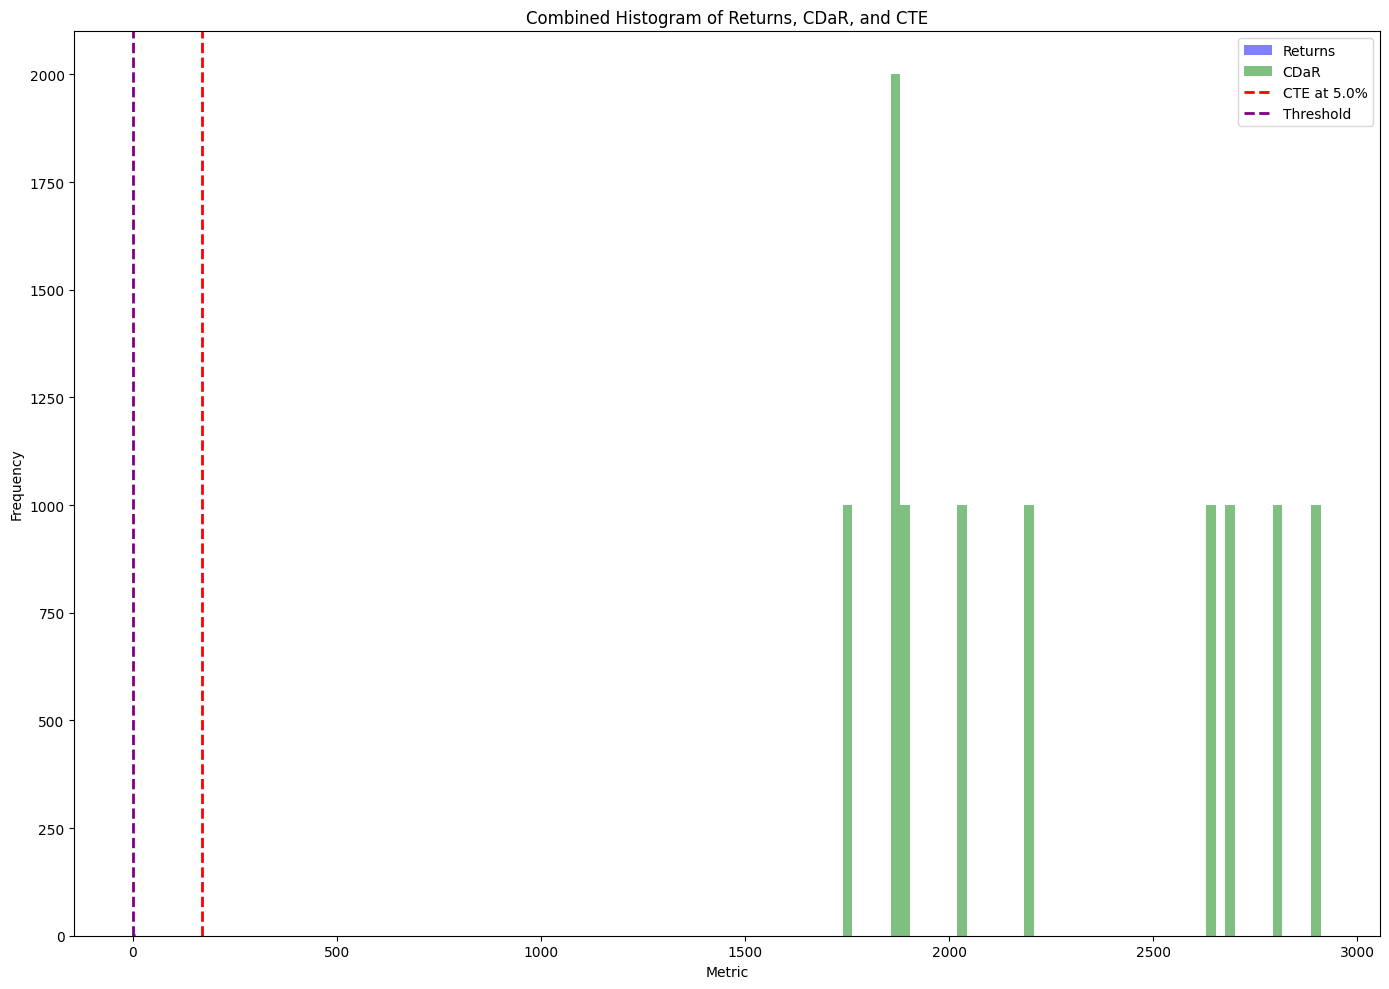

NameError: ignored

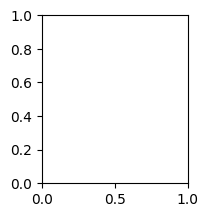

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set a random seed for reproducibility
np.random.seed(0)

# Function to simulate the interbank lending model with jumps
def interbank_lending_model_jumps(N, k, b, c, q, rho, T, dt, lam, gamma, eta):
    num_steps = int(T / dt)
    U = np.zeros((N, num_steps))
    U[:, 0] = np.random.exponential(scale=1 / lam, size=N)  # Exponential distribution for U_0

    dW = np.sqrt(dt) * np.random.randn(N, num_steps)  # Brownian motion increments

    for t in range(1, num_steps):
        for n in range(N):
            U_sum = np.sum(U[:, t - 1]) - U[n, t - 1]  # Sum of U except U_n
            dU = (k + b / N * U_sum - c * U[n, t - 1]) * dt + q * np.sqrt(np.abs(U[n, t - 1])) * dW[n, t - 1]

            # Determine the number of common jumps that occur at this time step
            num_jumps = np.random.poisson(N * eta * dt)
            if num_jumps > 0:
                jump_size = gamma * U[n, t - 1]  # Jump size for each bank
                dU += num_jumps * jump_size

            U[n, t] = U[n, t - 1] + dU + rho * U[n, t - 1] * dt

    return U

# Function to compute Conditional Tail Expectation (CTE)
def conditional_tail_expectation(returns, alpha, pdf):
    sorted_returns = np.sort(returns)
    n = len(sorted_returns)
    threshold_index = int((1 - alpha) * n)
    exceedances = sorted_returns[threshold_index:]
    cte = np.mean(exceedances) / alpha
    return cte

# Function to compute Downside Risk
def downside_risk(returns, threshold):
    return np.sqrt(np.mean(np.clip(returns - threshold, 0, None)**2))

# Function to compute Expected Loss (EL)
def expected_loss(PD, EAD, LGD):
    return np.sum(PD * EAD * LGD)

# Function to compute Conditional Drawdown at Risk (CDaR)
def conditional_drawdown_at_risk(returns, drawdown, threshold):
    exceedances = returns[drawdown >= threshold]
    return np.mean(exceedances)

# Simulate the interbank lending model with jumps
N = 10
T = 5.0
dt = 0.01
c_true = 1
q_true = 1
b_true = 1  # Updated true parameter value for b
rho_true = 0.4  # Updated true parameter value for rho
k_true = 0.1  # Updated true parameter value for k
lam_true = 0.5  # Updated true parameter value for lam
gamma_true = 0.3  # Updated true parameter value for gamma
eta_true = 0.01  # Updated true parameter value for eta
U_simulations = 1000  # Number of simulations

# Simulate the interbank lending model
U_simulated = interbank_lending_model_jumps(N, k_true, b_true, c_true, q_true, rho_true, T, dt, lam_true, gamma_true, eta_true)

# Compute CTE for the interbank lending model
alpha = 0.05  # Confidence level
threshold = 0  # Threshold for losses
returns = np.mean(U_simulated, axis=0)  # Calculate returns based on U_simulations
cte_alpha = conditional_tail_expectation(returns, alpha, norm.pdf)
print(f'CTE at {alpha*100}% confidence level: {cte_alpha}')

# Compute Downside Risk for the interbank lending model
threshold = 0  # Specify the return threshold
downside_risk_val = downside_risk(returns, threshold)
print(f'Downside Risk: {downside_risk_val}')

# Example PD, EAD, and LGD values
PD = np.random.uniform(0.01, 0.1, N)  # Example PD values
EAD = np.random.uniform(1e6, 1e7, N)  # Example EAD values
LGD = np.random.uniform(0.1, 0.5, N)  # Example LGD values

# Compute Expected Loss (EL) for the interbank lending model
expected_loss_val = expected_loss(PD, EAD, LGD)
print(f'Expected Loss (EL): {expected_loss_val}')

# Flatten the drawdown and returns arrays for comparison
drawdown_values = np.cumsum(U_simulated, axis=1)  # Calculate drawdown based on U_simulated
drawdown = np.tile(drawdown_values, (U_simulations, 1))  # Repeat drawdown simulations

# Ensure returns and drawdown have the same dimensions
returns_values = np.tile(returns, (U_simulations, 1))  # Repeat returns simulations

# Flatten the arrays for indexing
returns_flat = returns_values.flatten()
drawdown_flat = drawdown.flatten()

# Ensure drawdown_flat has the same shape as returns_flat
drawdown_flat = drawdown_flat[:len(returns_flat)]

cdar_alpha = conditional_drawdown_at_risk(returns_flat, drawdown_flat, threshold)
print(f'CDaR at {alpha*100}% confidence level: {cdar_alpha}')



# Calculate Sharpe Ratio and Sortino Ratio
risk_free_rate = 0.03  # Example risk-free rate
sharpe_ratio = (np.mean(returns) - risk_free_rate) / np.std(returns)
sortino_ratio = (np.mean(returns) - risk_free_rate) / downside_risk_val

# Create a single plot to display all metrics
plt.figure(figsize=(14, 10))

# Plot Returns Histogram
plt.hist(returns, bins=50, alpha=0.5, label='Returns', color='blue')

# Plot CDaR Histogram
plt.hist(drawdown[:, -1], bins=50, alpha=0.5, label='CDaR', color='green')

# Set CTE line
plt.axvline(cte_alpha, color='red', linestyle='dashed', linewidth=2, label=f'CTE at {alpha*100}%')

# Set Threshold line for Returns and CDaR
plt.axvline(threshold, color='purple', linestyle='dashed', linewidth=2, label='Threshold')

plt.xlabel('Metric')
plt.ylabel('Frequency')
plt.title('Combined Histogram of Returns, CDaR, and CTE')
plt.legend()

plt.tight_layout()
plt.show()

Total Monetary Reserve: 7635.98911134029


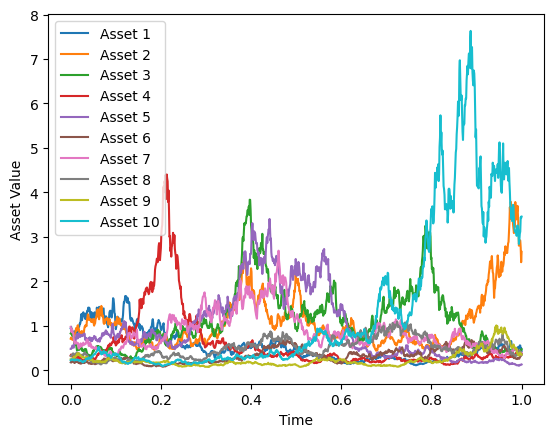

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def p_ij(x):
    if x[0] + x[1] >= 1:
        return 2 * np.min(x) / (x[0] + x[1])**2
    elif x[0] >= 0.5 and x[1] >= 0.5 and x[0] + x[1] <= 1:
        return 2 * np.min(x)
    elif x[0] <= 0.5 and x[1] <= 0.5 and x[0] + x[1] >= 0.5:
        return 2 * (x[0] + x[1]) - 1
    else:
        return 0

def feller_diffusion_model(n=10, T=1, dt=0.001):
    num_steps = int(T / dt)
    delta = np.random.rand(n)  # Constants
    X_total = np.random.rand()  # Initial total monetary reserve
    X_values = np.zeros((n, num_steps+1))
    X_values[:, 0] = np.random.rand(n)  # Initial values for assets

    for t in range(1, num_steps+1):
        dW = np.random.randn(n) * np.sqrt(X_values[:, t-1]) * np.sqrt(dt)
        for i in range(n):
            xi_xj = np.abs(X_values[:, t-1] - X_values[i, t-1])
            pij = p_ij(X_values[:, t-1])
            drift = delta[i] + np.sum((X_values[:, t-1] - X_values[i, t-1]) * pij)
            X_values[i, t] = X_values[i, t-1] + drift * dt + 2 * np.sqrt(X_values[i, t-1]) * dW[i]
        X_total += np.sum(X_values[:, t])

    print("Total Monetary Reserve:", X_total)

    for i in range(n):
        plt.plot(np.linspace(0, T, num_steps+1), X_values[i, :], label=f'Asset {i+1}')

    plt.xlabel('Time')
    plt.ylabel('Asset Value')
    plt.legend()
    plt.show()

# Call the function with default parameters
feller_diffusion_model()



Total Monetary Reserve (Simulation): 7.213793433505358


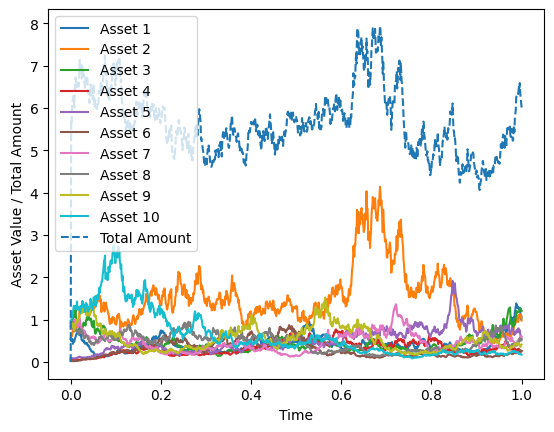

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

def p_ij(x):
    if x[0] + x[1] >= 1:
        return 2 * np.min(x) / (x[0] + x[1])**2
    elif x[0] >= 0.5 and x[1] >= 0.5 and x[0] + x[1] <= 1:
        return 2 * np.min(x)
    elif x[0] <= 0.5 and x[1] <= 0.5 and x[0] + x[1] >= 0.5:
        return 2 * (x[0] + x[1]) - 1
    else:
        return 0

def simulate_bank_reserves(n, T, dt, delta):
    num_steps = int(T / dt)
    X_total = np.random.rand()  # Initial total monetary reserve
    X_values = np.zeros((n, num_steps+1))
    X_values[:, 0] = np.random.rand(n)  # Initial values for assets
    total_over_time = np.zeros(num_steps+1)  # Array to store total amount over time
    dB_shared = np.random.randn(num_steps+1) * np.sqrt(dt)  # Shared Brownian motion

    for t in range(1, num_steps+1):
        dW = np.random.randn(n) * np.sqrt(X_values[:, t-1]) * np.sqrt(dt)
        for i in range(n):
            xi_xj = np.abs(X_values[:, t-1] - X_values[i, t-1])
            pij = p_ij(X_values[:, t-1])
            drift = delta[i] + np.sum((X_values[:, t-1] - X_values[i, t-1]) * pij)
            X_values[i, t] = X_values[i, t-1] + drift * dt + 2 * np.sqrt(X_values[i, t-1]) * dW[i]
            X_values[i, t] = max(X_values[i, t], 0)  # Ensure non-negativity
        X_total = np.sum(X_values[:, t])  # Update X_total at each time step
        total_over_time[t] = X_total  # Store total amount at each time step
        dB_total = (1 / np.sqrt(X_total)) * np.sqrt(X_values[:, t-1]).sum() * dB_shared[t]
        X_total += np.sum(np.sqrt(X_values[:, t-1]) * dB_total)
        X_total = max(X_total, 0)  # Ensure non-negativity

    return X_total, X_values, total_over_time, num_steps

# Simulate individual bank reserves and compute X_total
n = 10
T = 1
dt = 0.001
delta = np.random.rand(n)  # Constants
X_total, X_values, total_over_time, num_steps = simulate_bank_reserves(n, T, dt, delta)

print("Total Monetary Reserve (Simulation):", X_total)

# Plot the simulated asset paths and total amount over time
for i in range(n):
    plt.plot(np.linspace(0, T, num_steps+1), X_values[i, :], label=f'Asset {i+1}')

plt.plot(np.linspace(0, T, num_steps+1), total_over_time, label='Total Amount', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Asset Value / Total Amount')
plt.legend()
plt.show()


Total Monetary Reserve (Simulation): 17.523490359062468
Scenario: δ∗ > 2


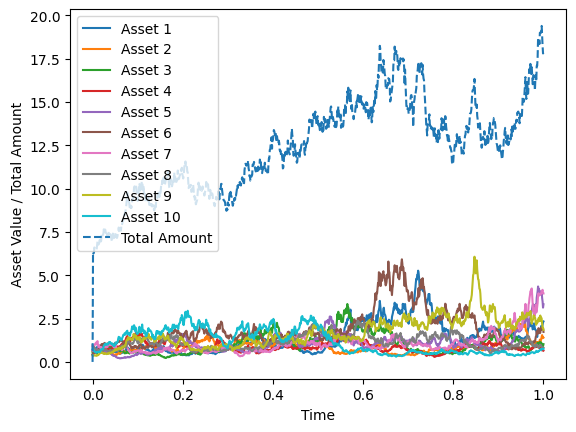

Total Monetary Reserve (Simulation): 20.2587366142085
Scenario: δ∗ = 2


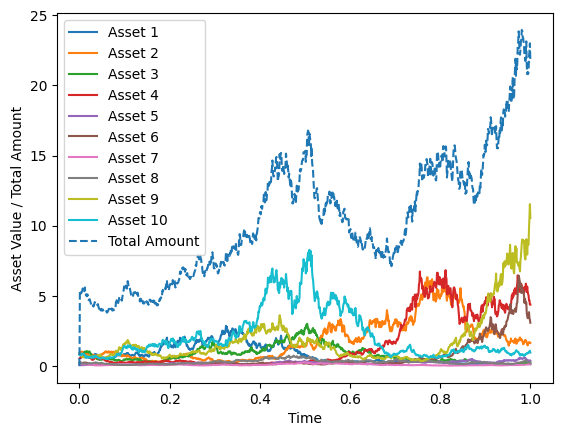

Total Monetary Reserve (Simulation): 2.0728493981344753
Scenario: 0 < δ∗ < 2


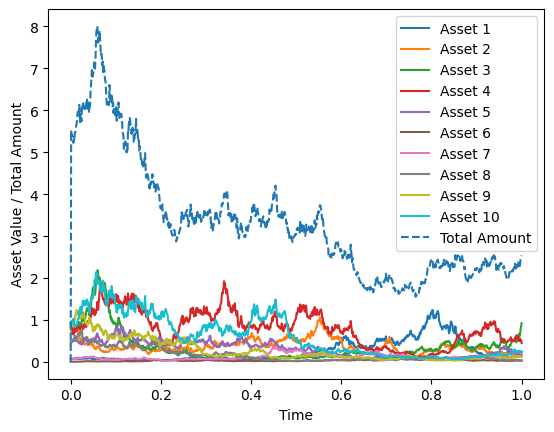

Total Monetary Reserve (Simulation): 0.9089895007176838
Scenario: δ∗ = 0


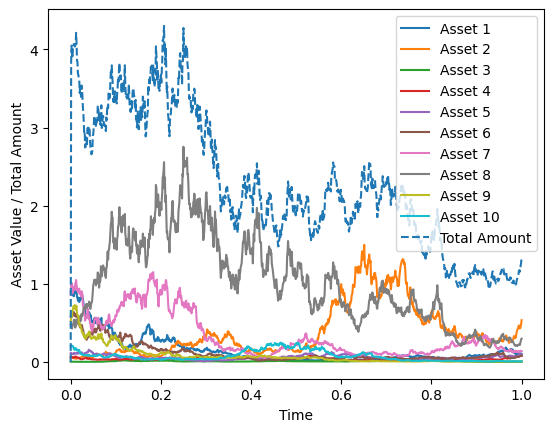

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

def p_ij(x):
    if x[0] + x[1] >= 1:
        return 2 * np.min(x) / (x[0] + x[1])**2
    elif x[0] >= 0.5 and x[1] >= 0.5 and x[0] + x[1] <= 1:
        return 2 * np.min(x)
    elif x[0] <= 0.5 and x[1] <= 0.5 and x[0] + x[1] >= 0.5:
        return 2 * (x[0] + x[1]) - 1
    else:
        return 0

def simulate_bank_reserves(n, T, dt, delta):
    num_steps = int(T / dt)
    X_total = np.random.rand()  # Initial total monetary reserve
    X_values = np.zeros((n, num_steps+1))
    X_values[:, 0] = np.random.rand(n)  # Initial values for assets
    total_over_time = np.zeros(num_steps+1)  # Array to store total amount over time
    dB_shared = np.random.randn(num_steps+1) * np.sqrt(dt)  # Shared Brownian motion

    for t in range(1, num_steps+1):
        dW = np.random.randn(n) * np.sqrt(X_values[:, t-1]) * np.sqrt(dt)
        for i in range(n):
            xi_xj = np.abs(X_values[:, t-1] - X_values[i, t-1])
            pij = p_ij(X_values[:, t-1])
            drift = delta[i] + np.sum((X_values[:, t-1] - X_values[i, t-1]) * pij)
            X_values[i, t] = X_values[i, t-1] + drift * dt + 2 * np.sqrt(X_values[i, t-1]) * dW[i]
            X_values[i, t] = max(X_values[i, t], 0)  # Ensure non-negativity
        X_total = np.sum(X_values[:, t])  # Update X_total at each time step
        total_over_time[t] = X_total  # Store total amount at each time step
        dB_total = (1 / np.sqrt(X_total)) * np.sqrt(X_values[:, t-1]).sum() * dB_shared[t]
        X_total += np.sum(np.sqrt(X_values[:, t-1]) * dB_total)
        X_total = max(X_total, 0)  # Ensure non-negativity

    return X_total, X_values, total_over_time, num_steps

# Function to simulate and plot based on delta_star
def simulate_and_plot(delta):
    n = len(delta)  # Number of assets
    T = 1
    dt = 0.001
    X_total, X_values, total_over_time, num_steps = simulate_bank_reserves(n, T, dt, delta)

    print("Total Monetary Reserve (Simulation):", X_total)

    # Calculate delta_star
    delta_star = np.sum(delta)

    # Check and print scenarios based on delta_star
    if delta_star > 2:
        scenario = "δ∗ > 2"
    elif delta_star == 2:
        scenario = "δ∗ = 2"
    elif delta_star > 0:
        scenario = "0 < δ∗ < 2"
    else:
        scenario = "δ∗ = 0"

    print("Scenario:", scenario)

    # Plot the simulated asset paths and total amount over time
    for i in range(n):
        plt.plot(np.linspace(0, T, num_steps+1), X_values[i, :], label=f'Asset {i+1}')

    plt.plot(np.linspace(0, T, num_steps+1), total_over_time, label='Total Amount', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Asset Value / Total Amount')
    plt.legend()
    plt.show()

# Define the number of assets
n = 10

# Scenario 1: δ∗ >= 2 (All delta values are 2.1)
delta_scenario_1 = np.full(n, 2.1)

# Scenario 2: δ∗ = 2 (All delta values are 1.9)
delta_scenario_2 = np.full(n, 0.2)

# Scenario 3: 0 < δ∗ < 2 (All delta values are 0.5)
delta_scenario_3 = np.full(n, 0.1)

# Scenario 4: δ∗ = 0 (All delta values are 0)
delta_scenario_4 = np.zeros(n)

# Simulate and plot scenarios
simulate_and_plot(delta_scenario_1)
simulate_and_plot(delta_scenario_2)
simulate_and_plot(delta_scenario_3)
simulate_and_plot(delta_scenario_4)


Total Monetary Reserve (Simulation): 7.679208211064312


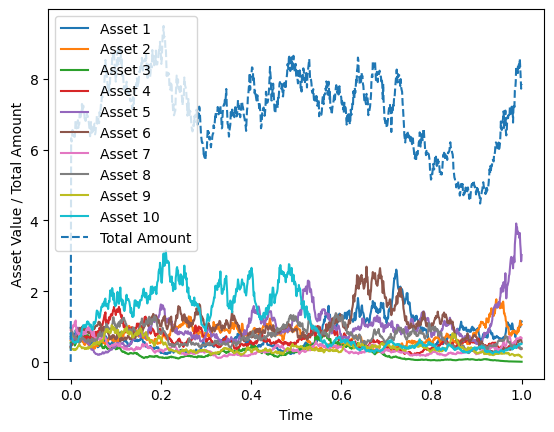

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

def p_ij(x):
    if x[0] + x[1] >= 1:
        return 2 * np.min(x) / (x[0] + x[1])**2
    elif x[0] >= 0.5 and x[1] >= 0.5 and x[0] + x[1] <= 1:
        return 2 * np.min(x)
    elif x[0] <= 0.5 and x[1] <= 0.5 and x[0] + x[1] >= 0.5:
        return 2 * (x[0] + x[1]) - 1
    else:
        return 0

def simulate_bank_reserves(n, T, dt, delta):
    num_steps = int(T / dt)
    X_total = np.random.rand()  # Initial total monetary reserve
    X_values = np.zeros((n, num_steps+1))
    X_values[:, 0] = np.random.rand(n)  # Initial values for assets
    total_over_time = np.zeros(num_steps+1)  # Array to store total amount over time
    dB_shared = np.random.randn(num_steps+1) * np.sqrt(dt)  # Shared Brownian motion

    for t in range(1, num_steps+1):
        dW = np.random.randn(n) * np.sqrt(X_values[:, t-1]) * np.sqrt(dt)
        for i in range(n):
            xi_xj = np.abs(X_values[:, t-1] - X_values[i, t-1])
            pij = p_ij(X_values[:, t-1])
            drift = delta[i] + np.sum((X_values[:, t-1] - X_values[i, t-1]) * pij)
            X_values[i, t] = X_values[i, t-1] + drift * dt + 2 * np.sqrt(X_values[i, t-1]) * dW[i]
            X_values[i, t] = max(X_values[i, t], 0)  # Ensure non-negativity
        X_total = np.sum(X_values[:, t])  # Update X_total at each time step
        total_over_time[t] = X_total  # Store total amount at each time step
        dB_total = (1 / np.sqrt(X_total)) * np.sqrt(X_values[:, t-1]).sum() * dB_shared[t]
        X_total += np.sum(np.sqrt(X_values[:, t-1]) * dB_total)
        X_total = max(X_total, 0)  # Ensure non-negativity

    return X_total, X_values, total_over_time, num_steps

# Function to simulate and plot
def simulate_and_plot(delta):
    n = len(delta)  # Number of assets
    T = 1
    dt = 0.001
    X_total, X_values, total_over_time, num_steps = simulate_bank_reserves(n, T, dt, delta)

    print("Total Monetary Reserve (Simulation):", X_total)

    # Plot the simulated asset paths and total amount over time
    for i in range(n):
        plt.plot(np.linspace(0, T, num_steps+1), X_values[i, :], label=f'Asset {i+1}')

    plt.plot(np.linspace(0, T, num_steps+1), total_over_time, label='Total Amount', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Asset Value / Total Amount')
    plt.legend()
    plt.show()

# Define the number of assets
n = 10

# Define delta values for a scenario where some banks default
delta_scenario_with_defaults = np.array([1.0, 2.0, -0.5, 1.5, 2.5, 0.0, -0.2, 1.0, -1.0, 2.0])

# Simulate and plot the scenario
simulate_and_plot(delta_scenario_with_defaults)
